# Modelos de clasificación

**Autor:**
+ Martín Castro Morales
+ martin.castro@alumnos.ubiobio.cl

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción

# Carga de datos

In [ ]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/empleados.csv.zip

# Descomprimir el archivo
!unzip -q empleados.csv.zip

# Eliminar el archivo zip
!rm empleados.csv.zip

# Eliminar la carpeta __MACOSX si se creó
!rm -rf __MACOSX

--2024-10-25 12:48:36--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/empleados.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1716432 (1.6M) [application/zip]
Saving to: ‘empleados.csv.zip’

empleados.csv.zip   100%[===================>]   1.64M  --.-KB/s    in 0.07s   

2024-10-25 12:48:36 (23.8 MB/s) - ‘empleados.csv.zip’ saved [1716432/1716432]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, label_binarize

from collections import Counter

# Metodología CRISP-DM

## Fase 2 - Comprensión de los datos

In [ ]:
# Escriba su código acá
df = pd.read_csv("empleados.csv", sep=',')
df.head()



,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
#Quitar los espacios
df.columns = df.columns.str.lower().str.replace(" |-", "_", regex=True)
df.head()

,employee_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
#df.age.unique()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   employee_id               74498 non-null  int64 
 1   age                       74498 non-null  int64 
 2   gender                    74498 non-null  object
 3   years_at_company          74498 non-null  int64 
 4   job_role                  74498 non-null  object
 5   monthly_income            74498 non-null  int64 
 6   work_life_balance         74498 non-null  object
 7   job_satisfaction          74498 non-null  object
 8   performance_rating        74498 non-null  object
 9   number_of_promotions      74498 non-null  int64 
 10  overtime                  74498 non-null  object
 11  distance_from_home        74498 non-null  int64 
 12  education_level           74498 non-null  object
 13  marital_status            74498 non-null  object
 14  number_of_dependents  

No se observan valores nulos

In [ ]:
#Convertir cualitativas a tipo categoria
df.gender = df.gender.astype("category")
df.job_role = df.job_role.astype("category")
df.work_life_balance = df.work_life_balance.astype("category")
df.job_satisfaction = df.job_satisfaction.astype("category")
df.performance_rating = df.performance_rating.astype("category")
df.job_level = df.job_level.astype("category")
df.company_size = df.company_size.astype("category")
df.leadership_opportunities = df.leadership_opportunities.astype("category")
df.innovation_opportunities = df.innovation_opportunities.astype("category")
df.company_reputation = df.company_reputation.astype("category")
df.employee_recognition = df.employee_recognition.astype("category")
df.attrition = df.attrition.astype("category")
df.remote_work = df.remote_work.astype("category")

In [ ]:
df.describe(include="category").T

,count,unique,top,freq
gender,74498,2,Male,40826
job_role,74498,5,Technology,19322
work_life_balance,74498,4,Good,28158
job_satisfaction,74498,4,High,37245
performance_rating,74498,4,Average,44719
job_level,74498,3,Entry,29780
company_size,74498,3,Medium,37231
remote_work,74498,2,No,60300
leadership_opportunities,74498,2,No,70845
innovation_opportunities,74498,2,No,62394


In [ ]:
df.describe()

,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,company_tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832935,49.991584,1.650326,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995289,28.513611,1.553633,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [ ]:
df.attrition.unique()

['Stayed', 'Left']
Categories (2, object): ['Left', 'Stayed']

In [ ]:
df[df.attrition == 'Left'].shape[0]

35370

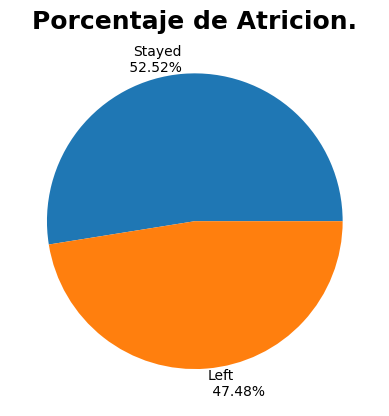

In [ ]:
# Hacer graficos aqui
# Gráfico de tortas del porcentaje de usuarios de cada sistema operativo
# Contando los usuarios
attrition = np.array([df[df.attrition == 'Stayed'].shape[0],
                   df[df.attrition == 'Left'].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / attrition.sum() * 100.0, 2)) + '%'  for x in attrition ]
labels[0] = 'Stayed\n ' + labels[0]
labels[1] = 'Left\n ' + labels[1]

plt.pie(attrition, labels=labels)
plt.title('Porcentaje de Atricion.', fontsize=18, fontweight="bold")
plt.show()

Se tiene una cantidad mayor de *Stayed* pero no por mucho por lo que no deberia ser significativo

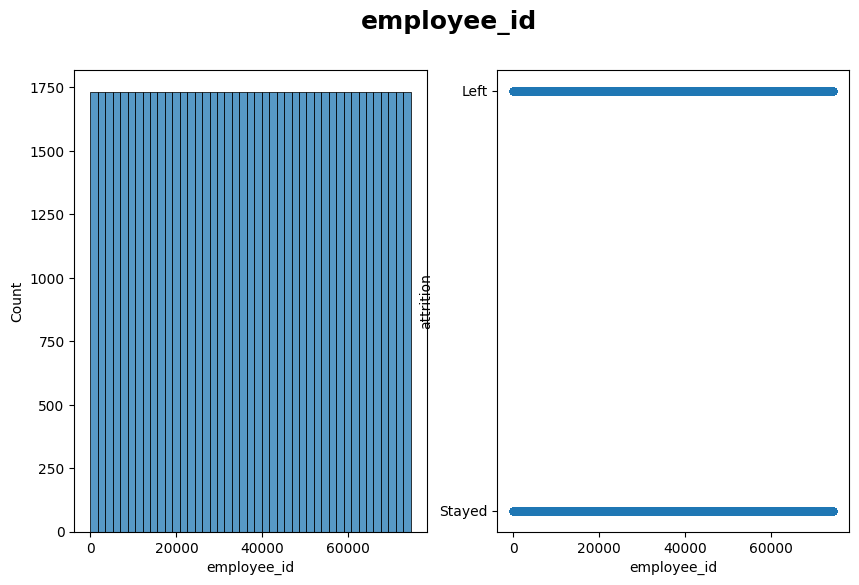

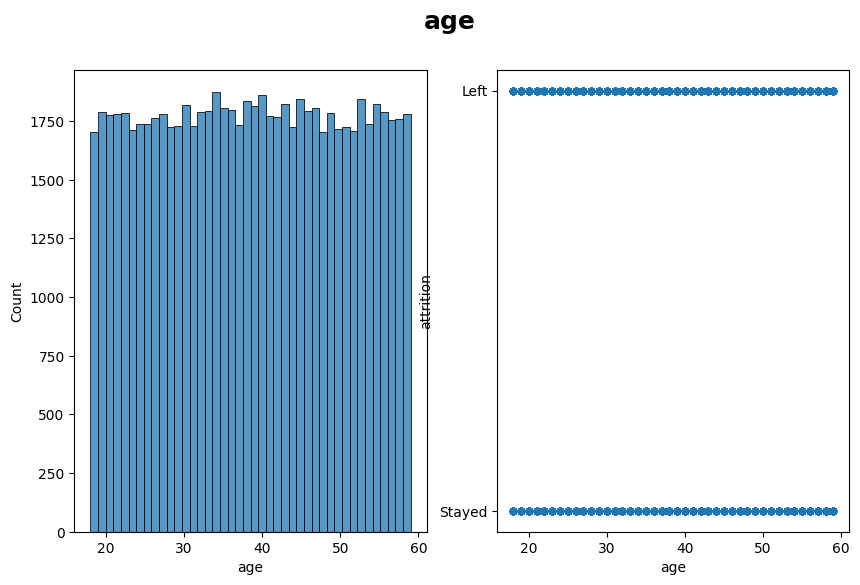

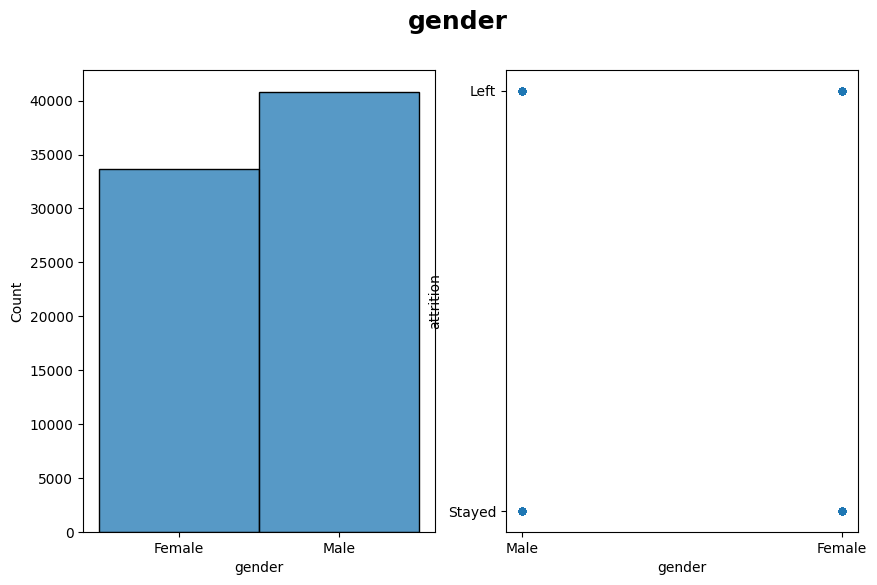

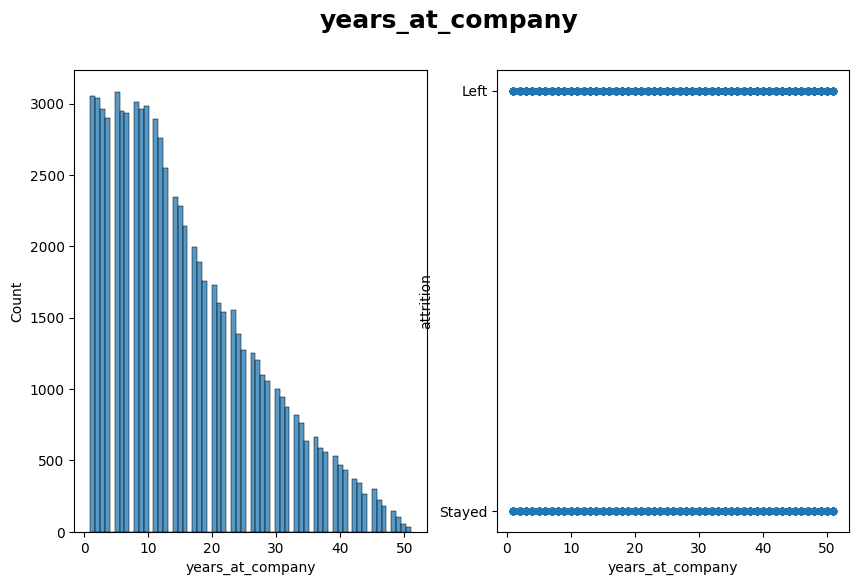

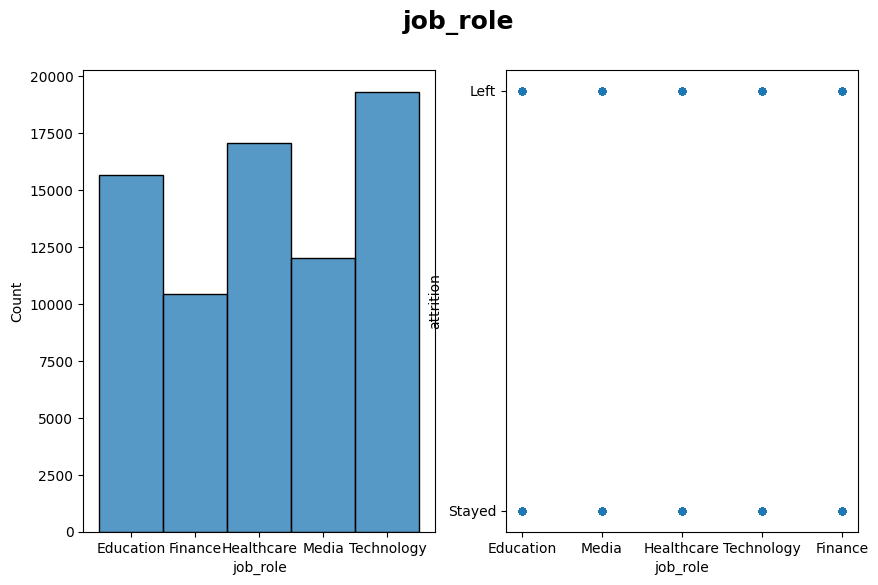

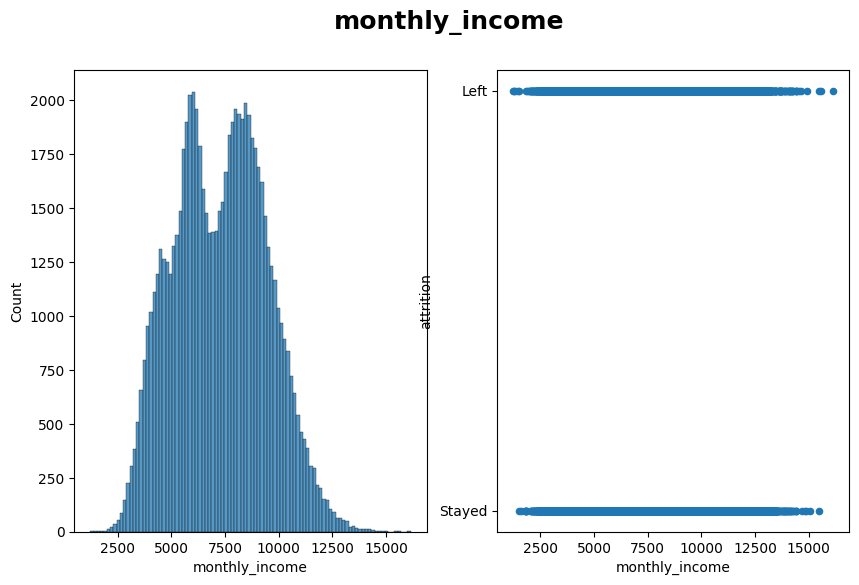

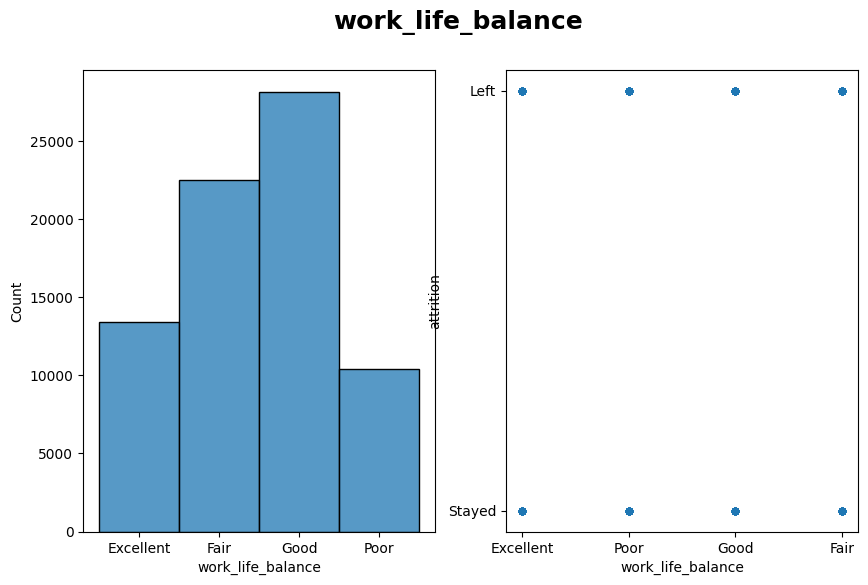

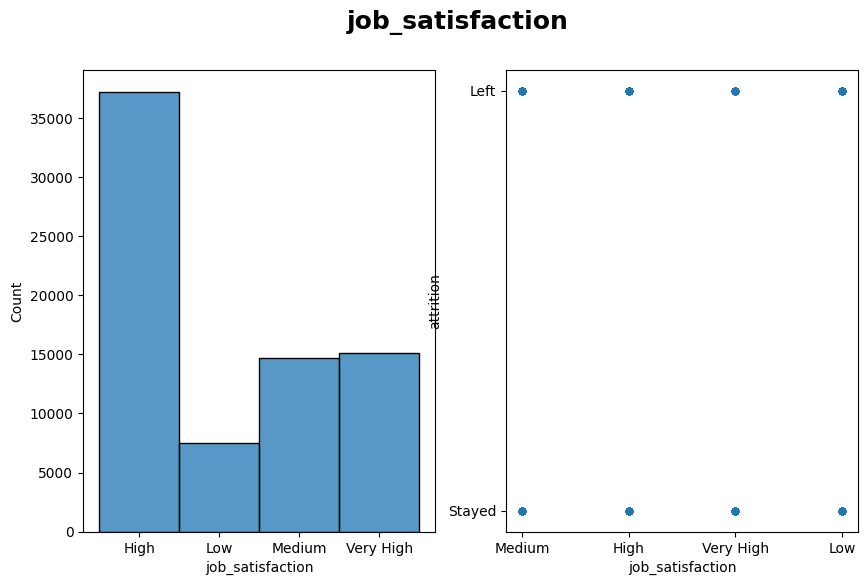

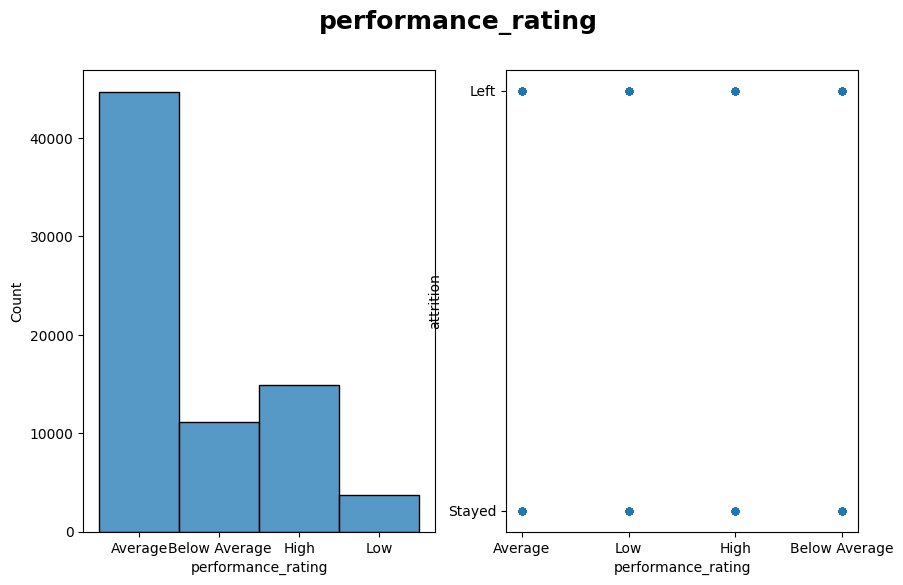

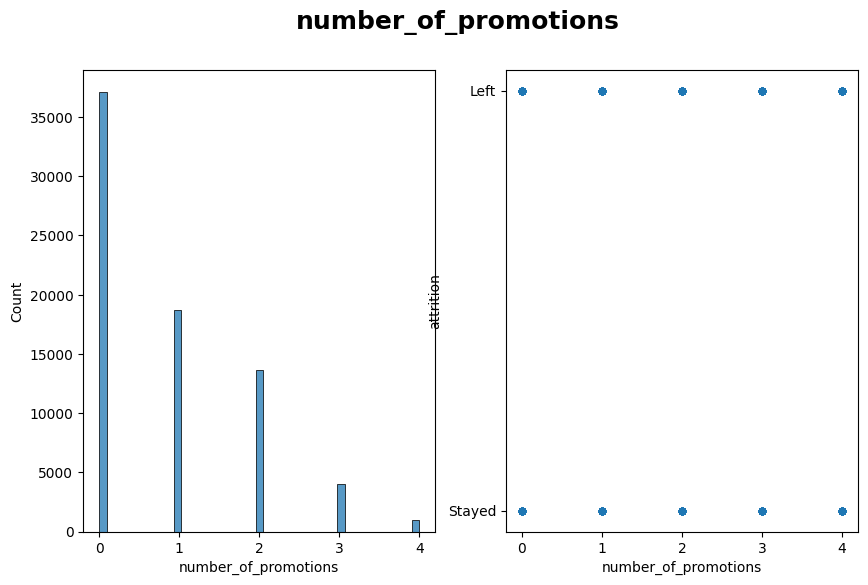

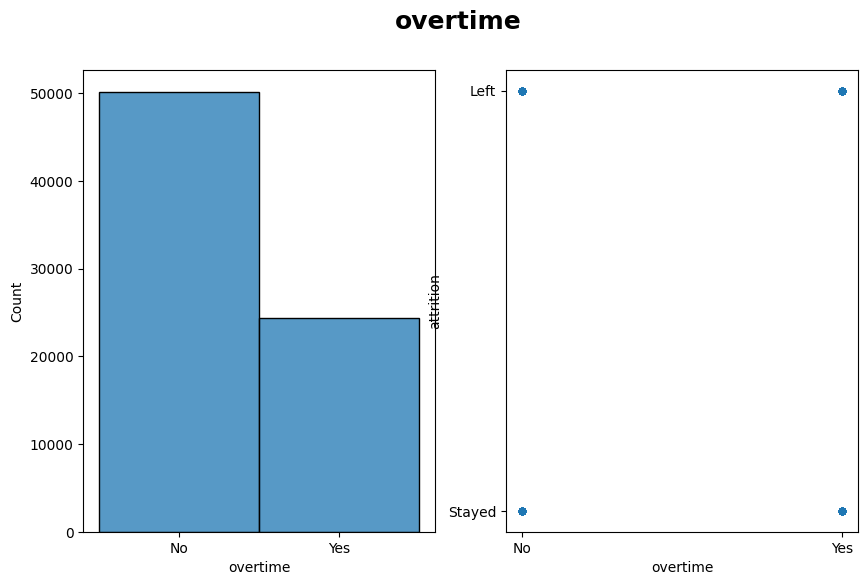

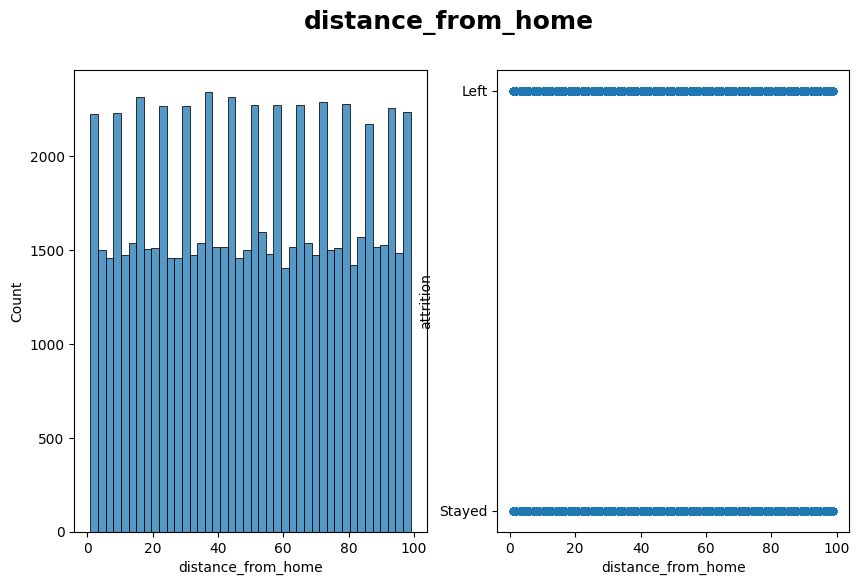

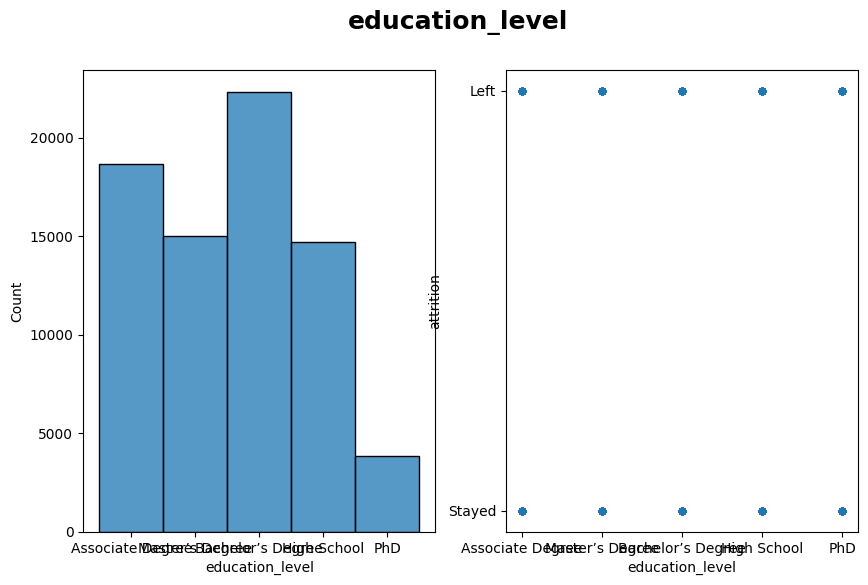

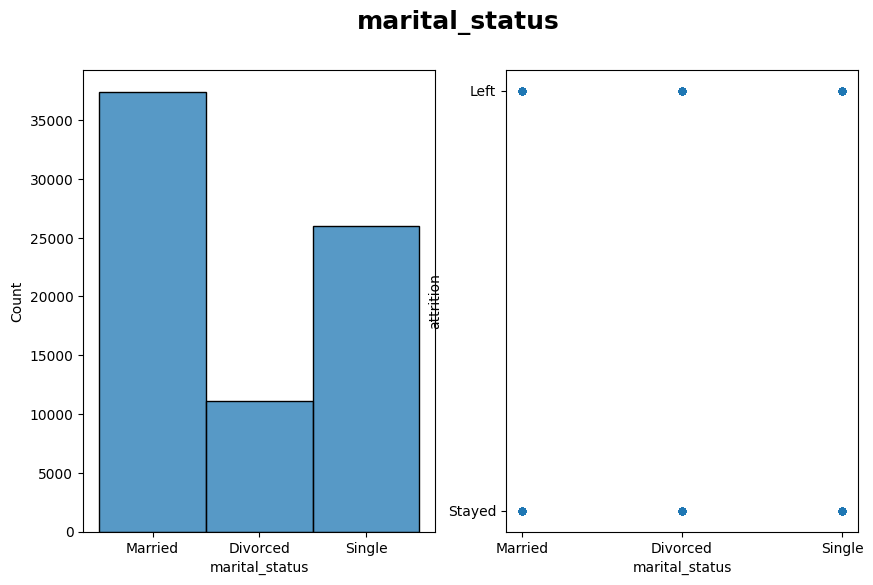

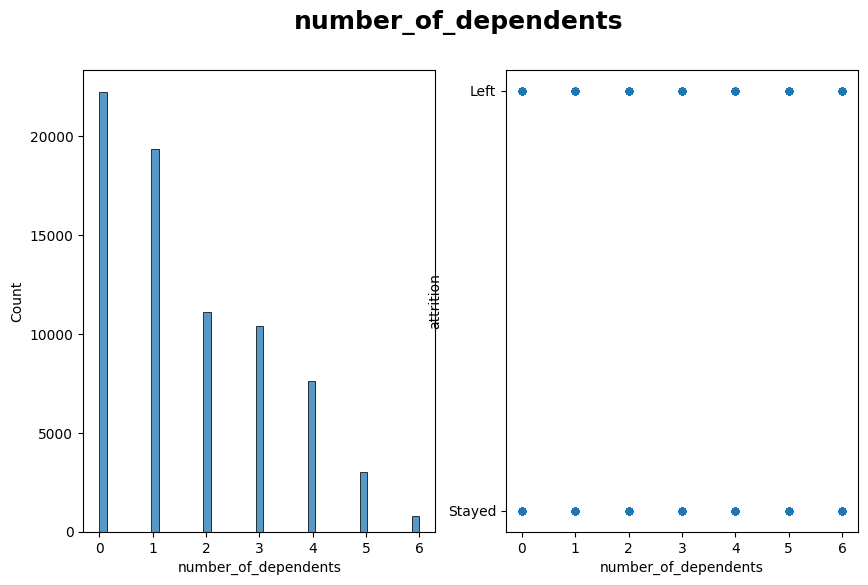

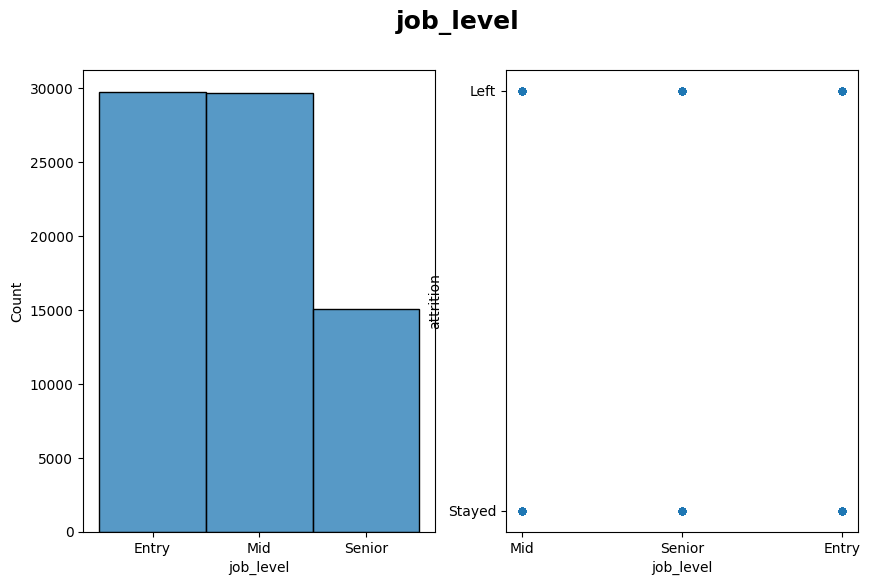

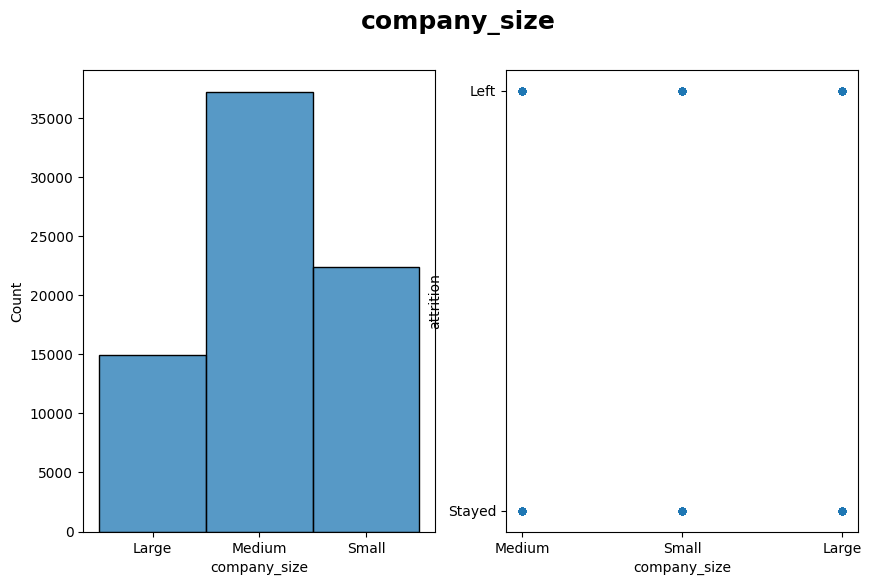

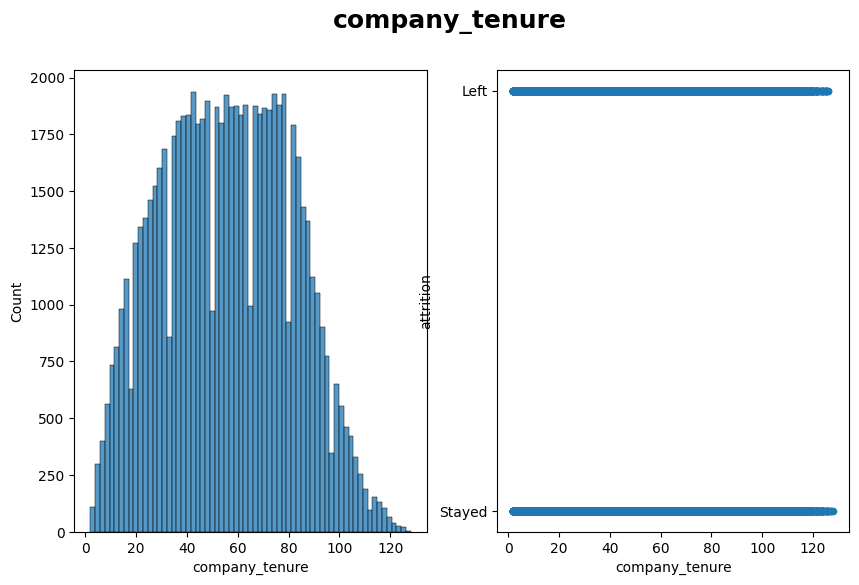

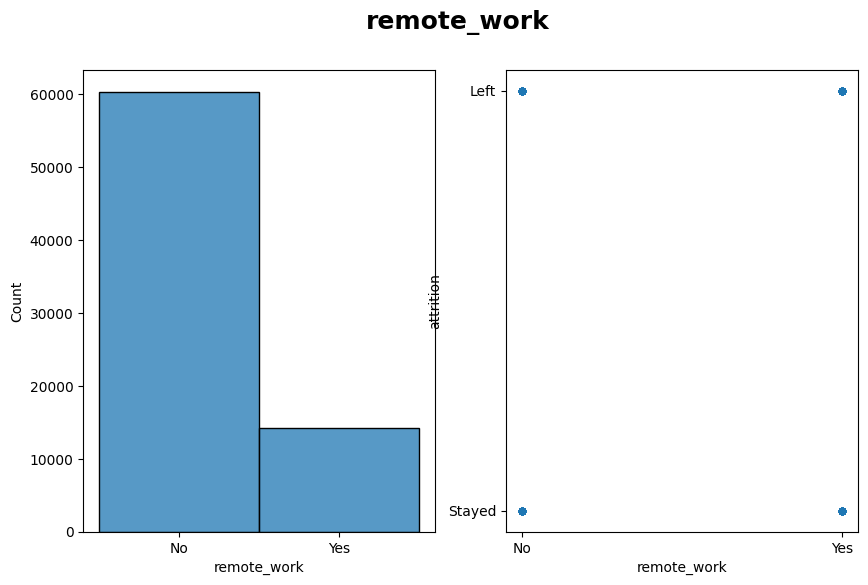

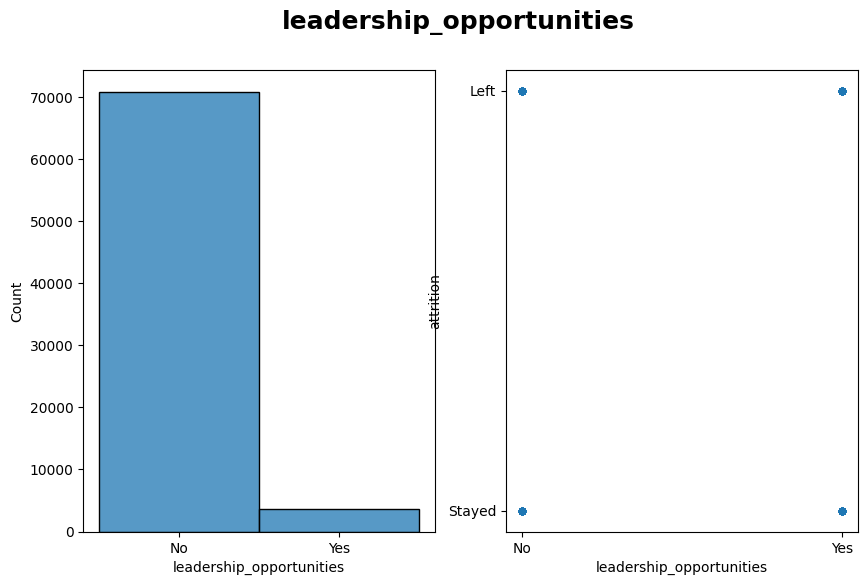

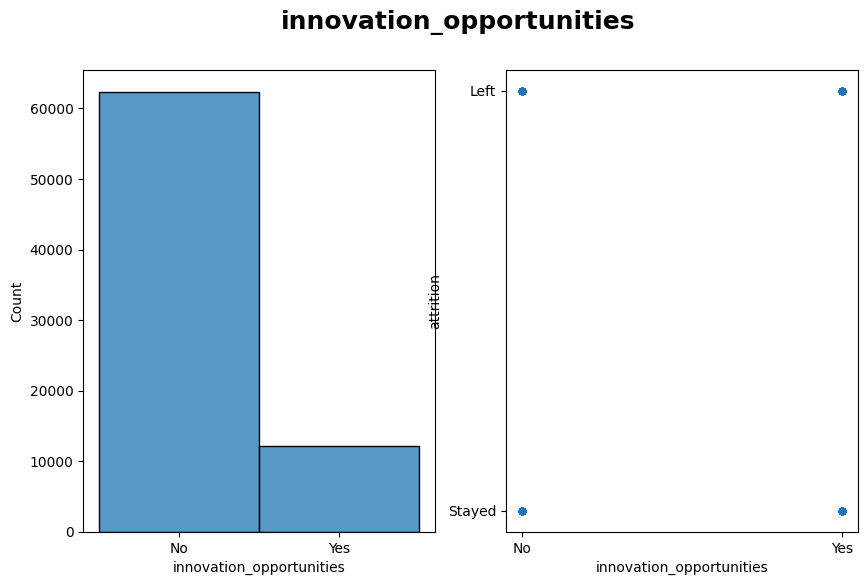

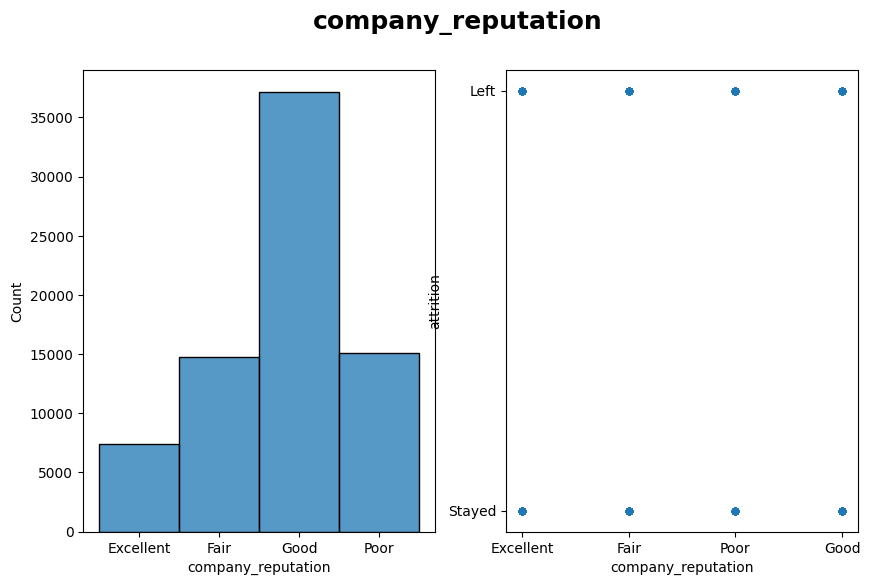

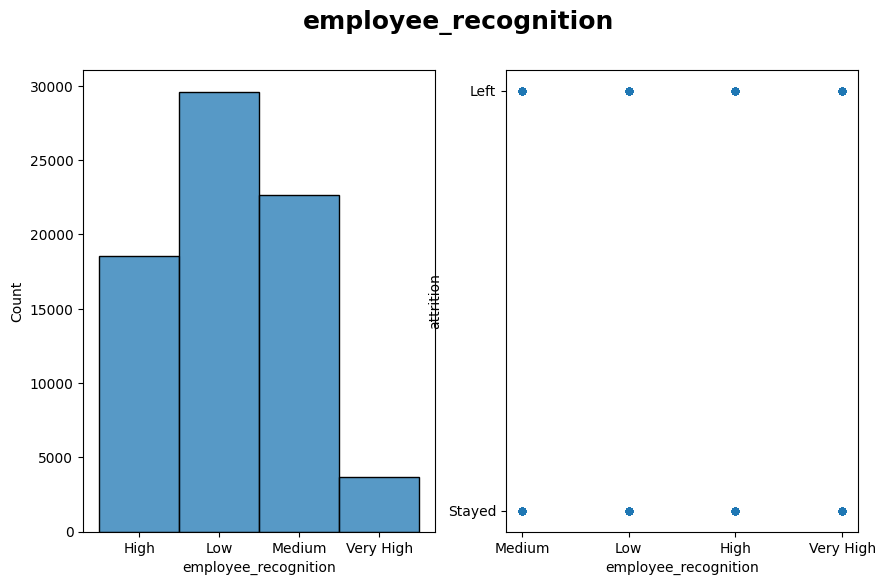

In [ ]:
columnas = np.array(df.columns)

for col in columnas[:-1]:
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle(col, fontsize=18, fontweight="bold")
    sns.histplot(df[col], ax=ax[0], kde=False)
    df[[col]+['attrition']].plot.scatter(x=col, y='attrition', ax=ax[1])
    plt.show()

A simple vista se puede observar las siguientes correlaciones:

- yearsAtTheCompany
- numberOfPromotions
- numberOfDependants
- remote_work
- leadership_oportunities
- innovation_oportunities

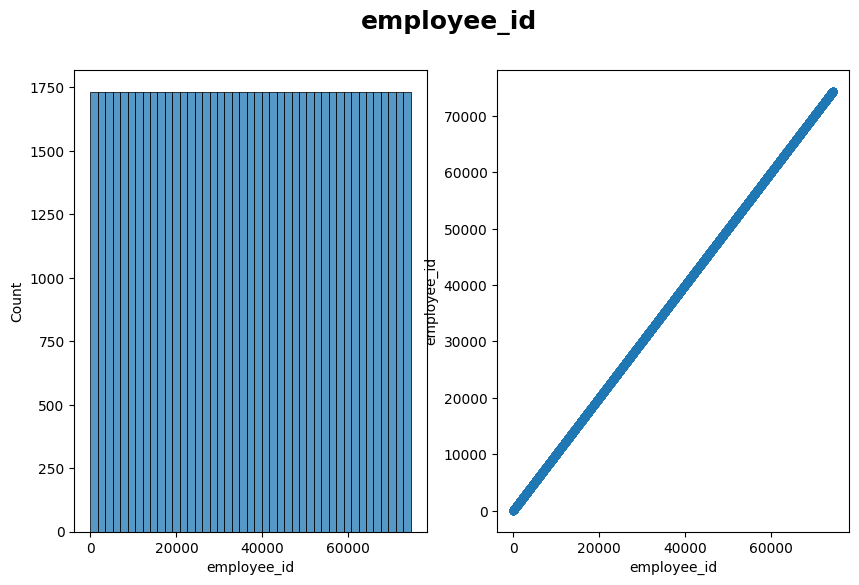

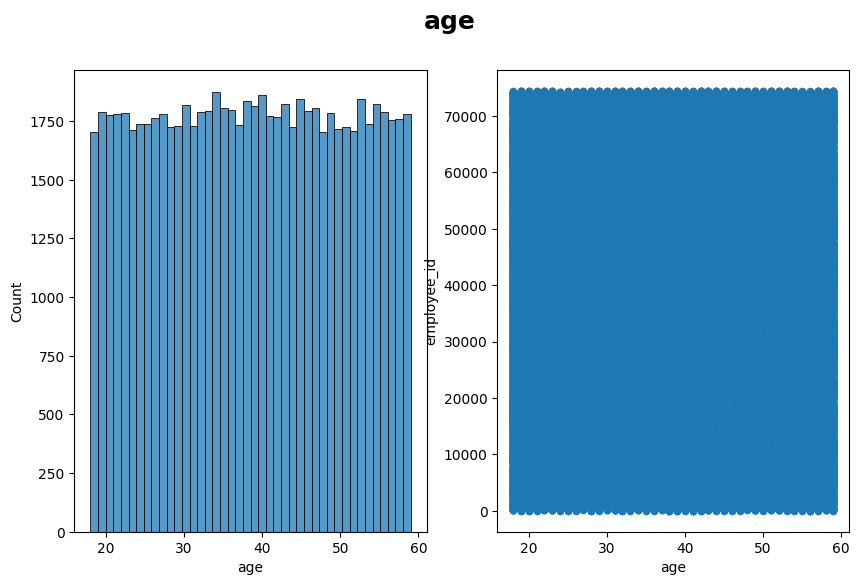

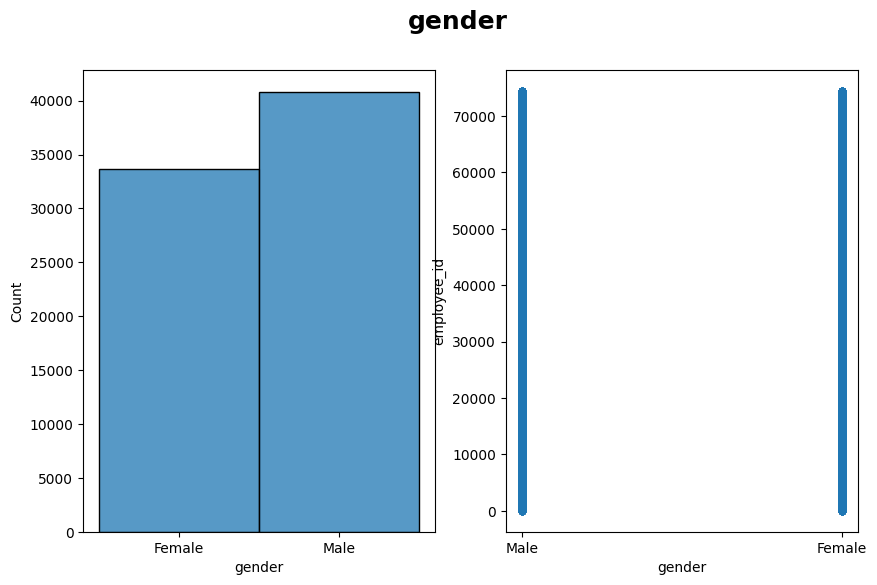

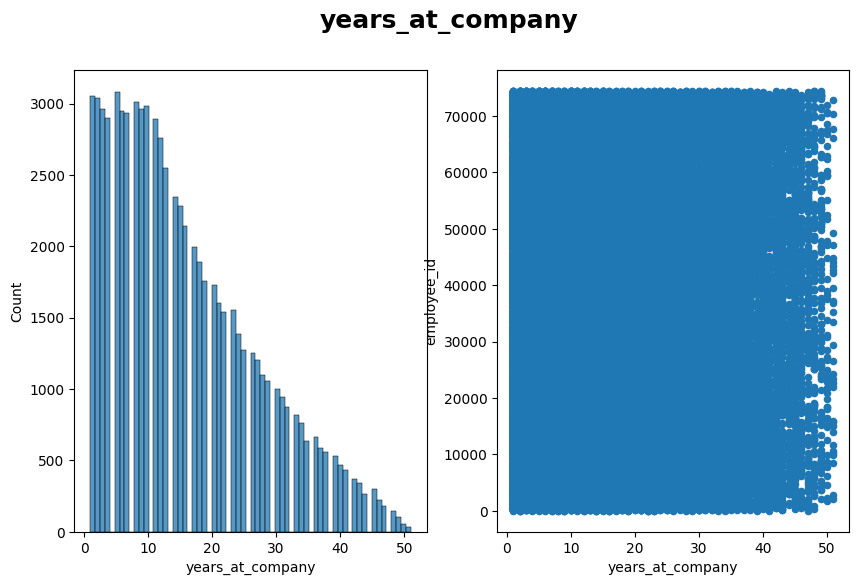

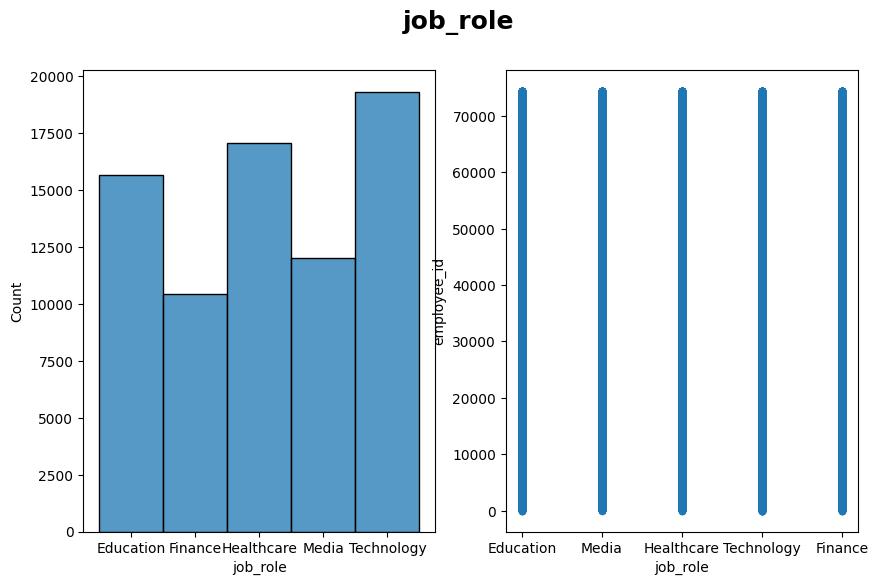

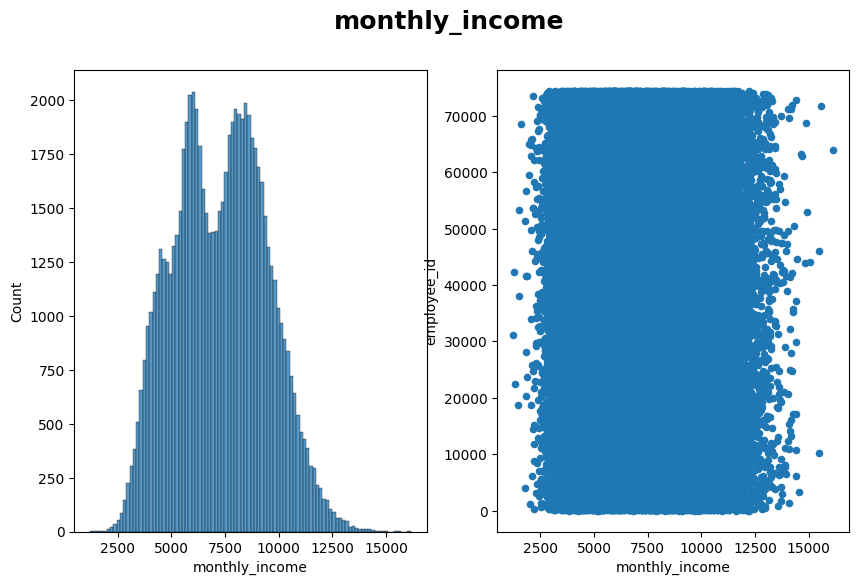

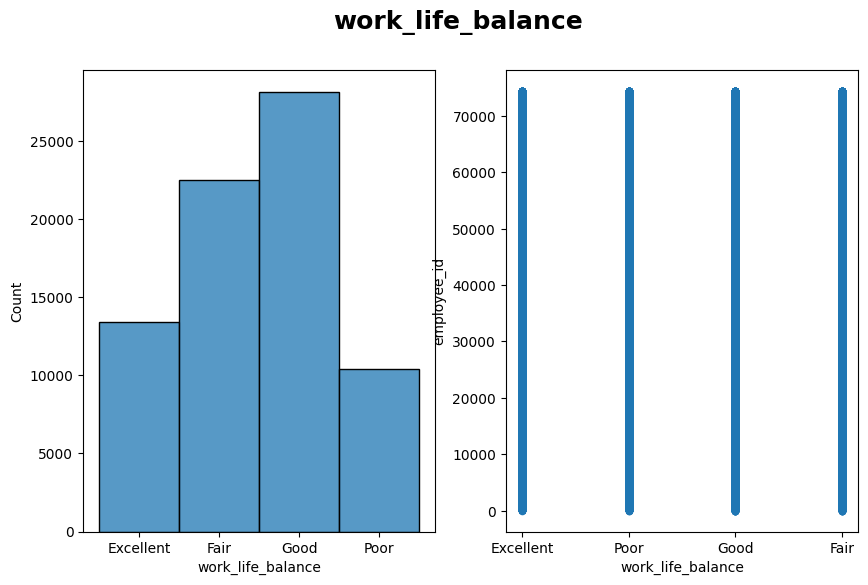

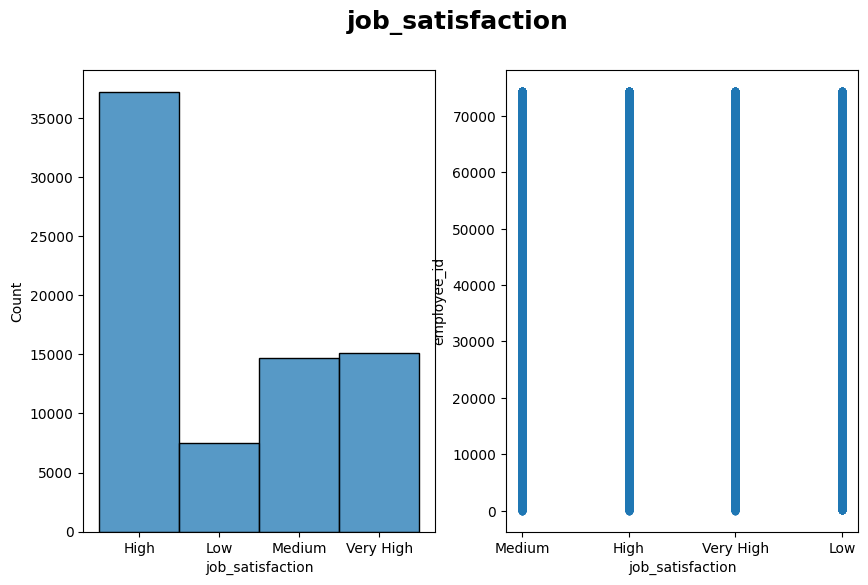

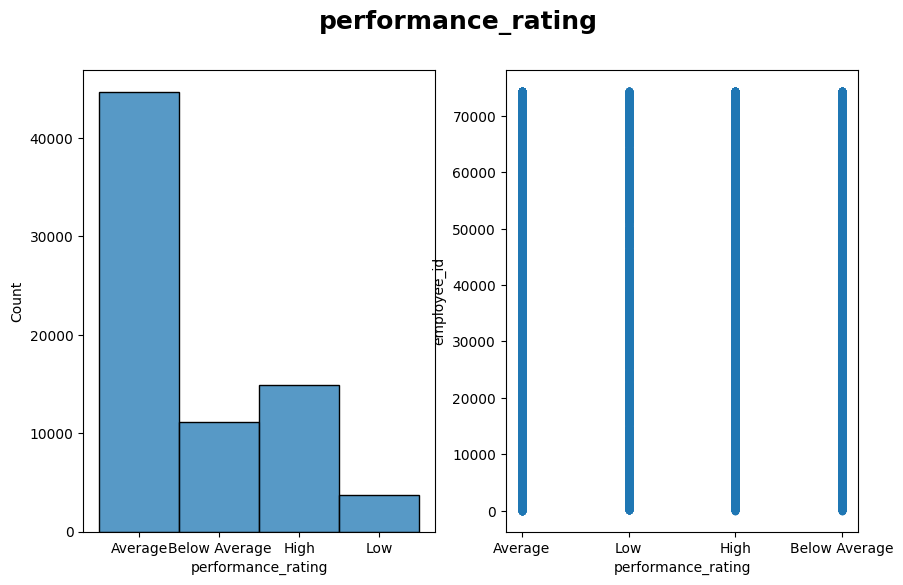

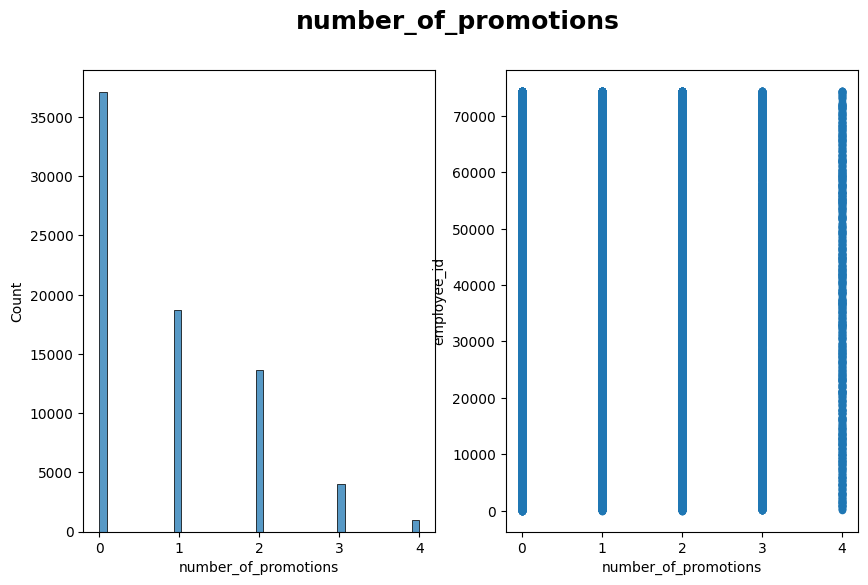

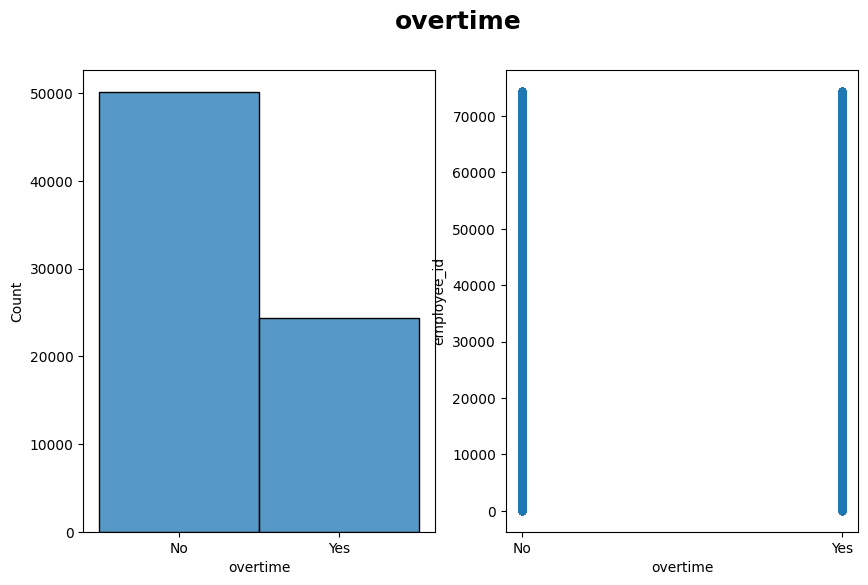

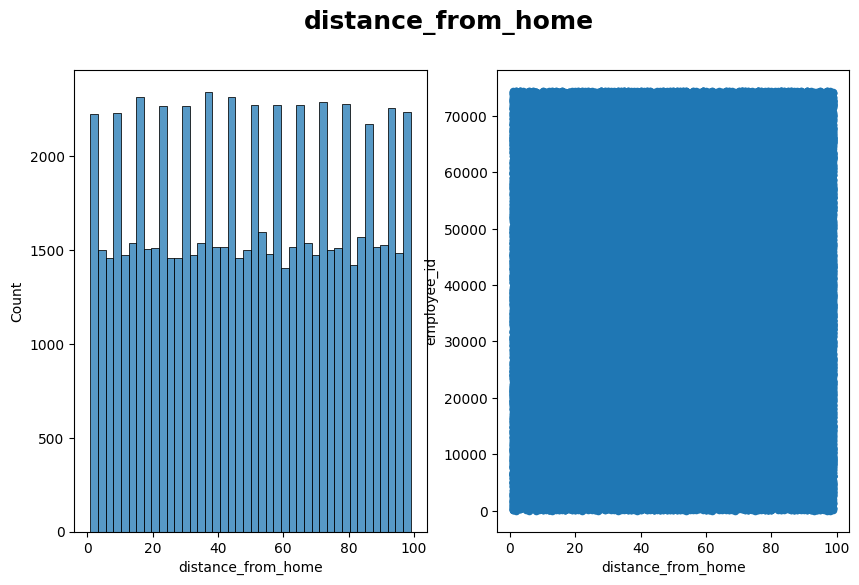

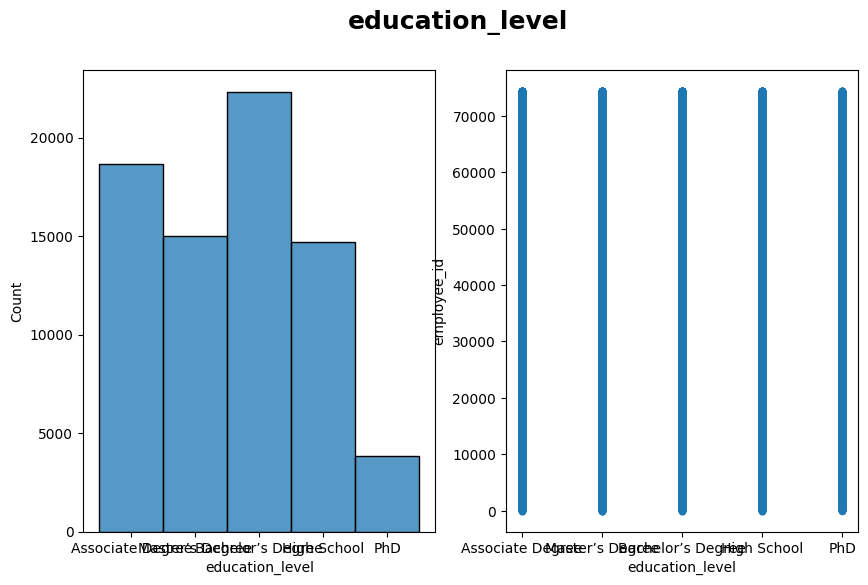

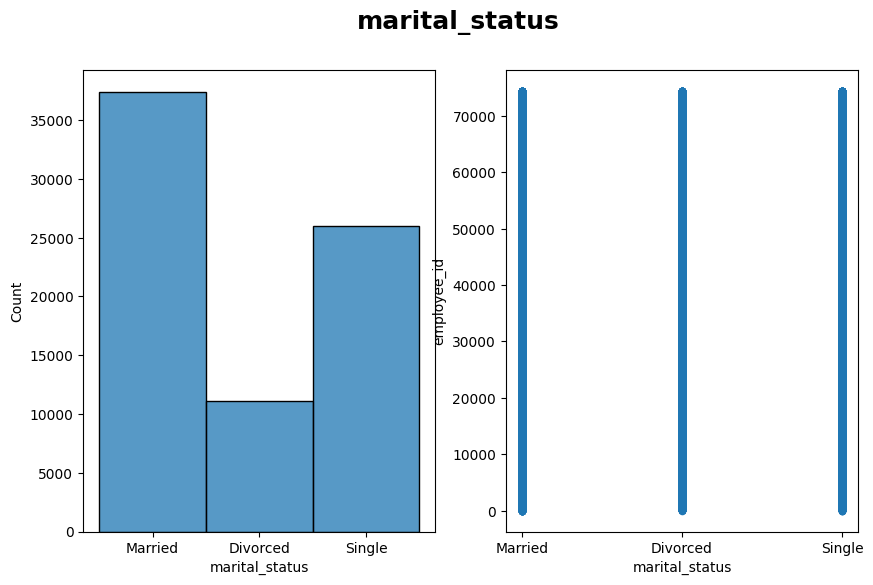

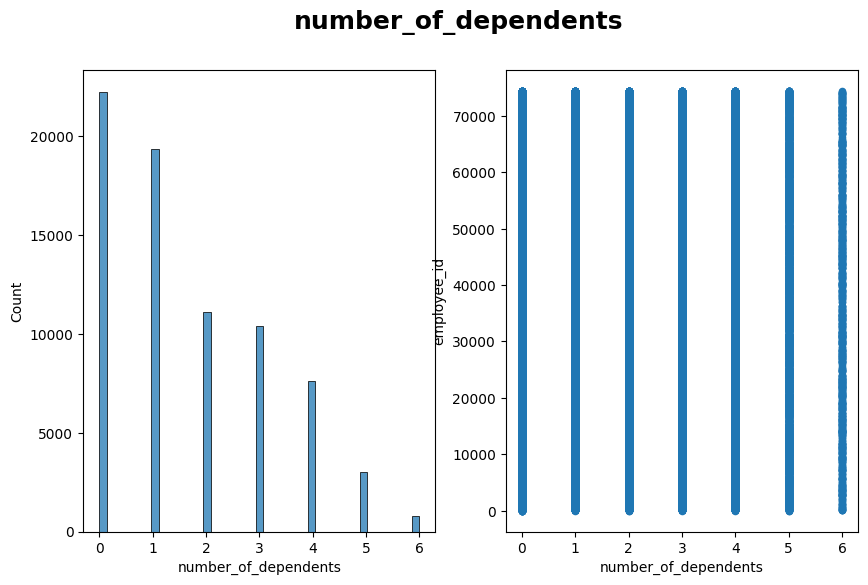

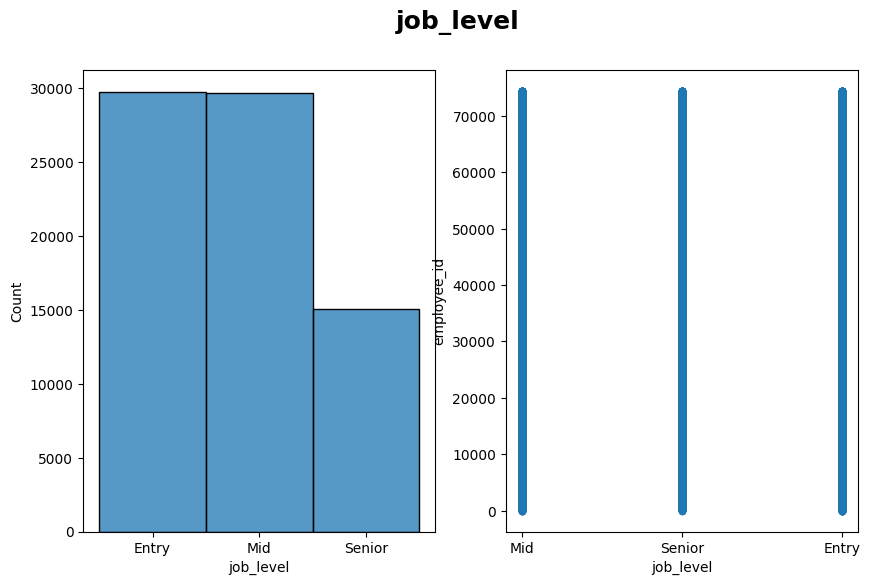

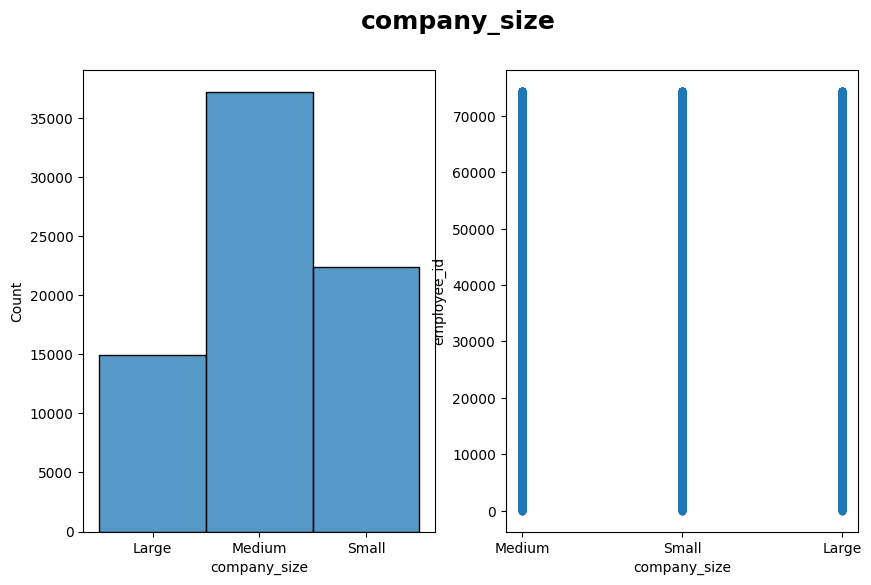

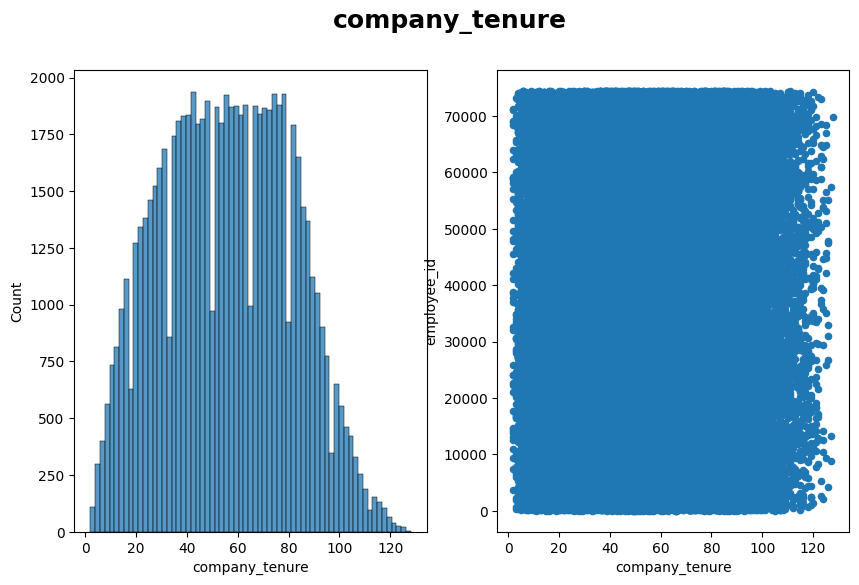

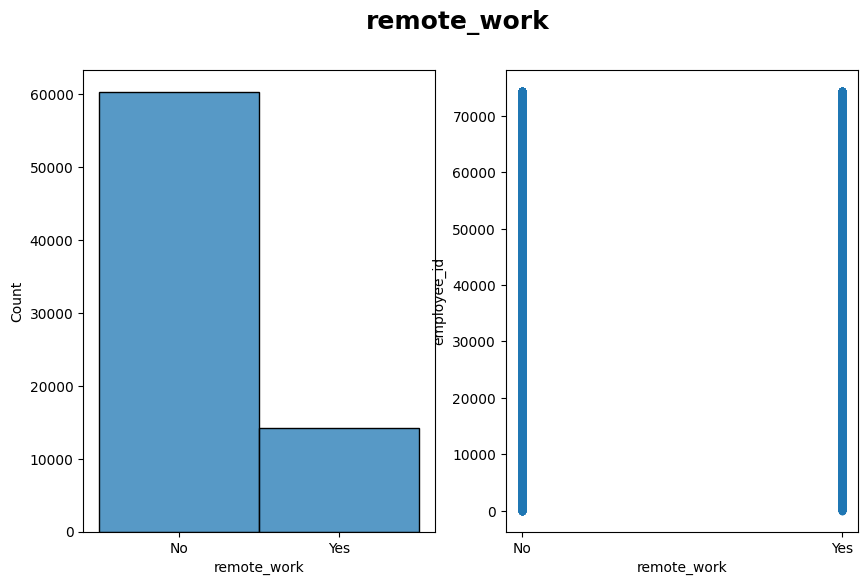

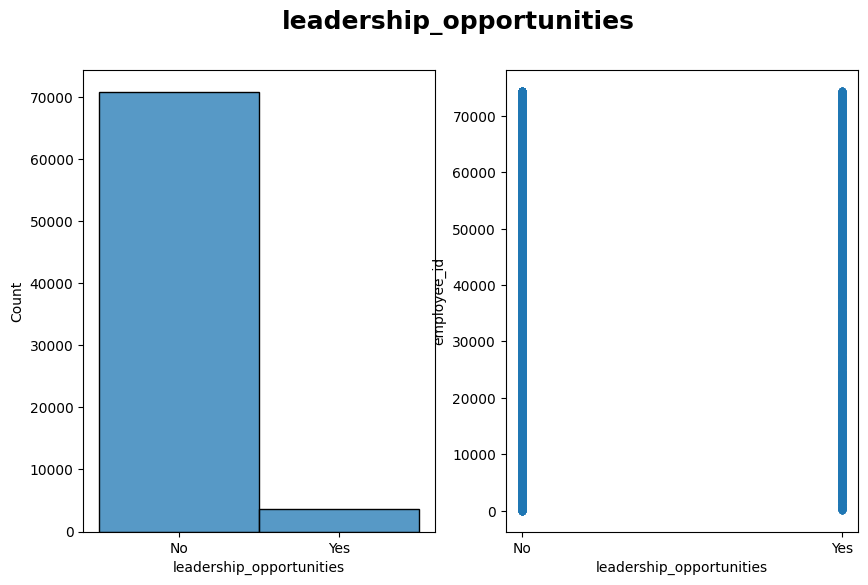

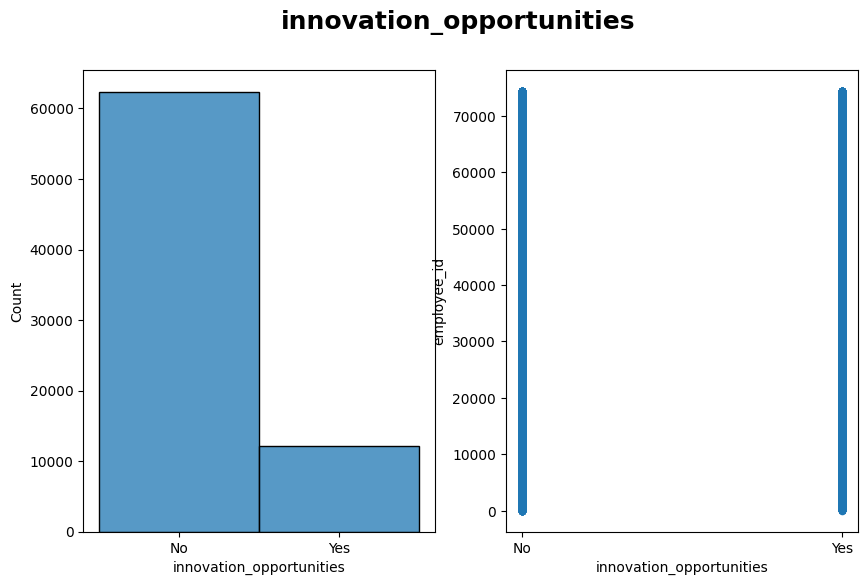

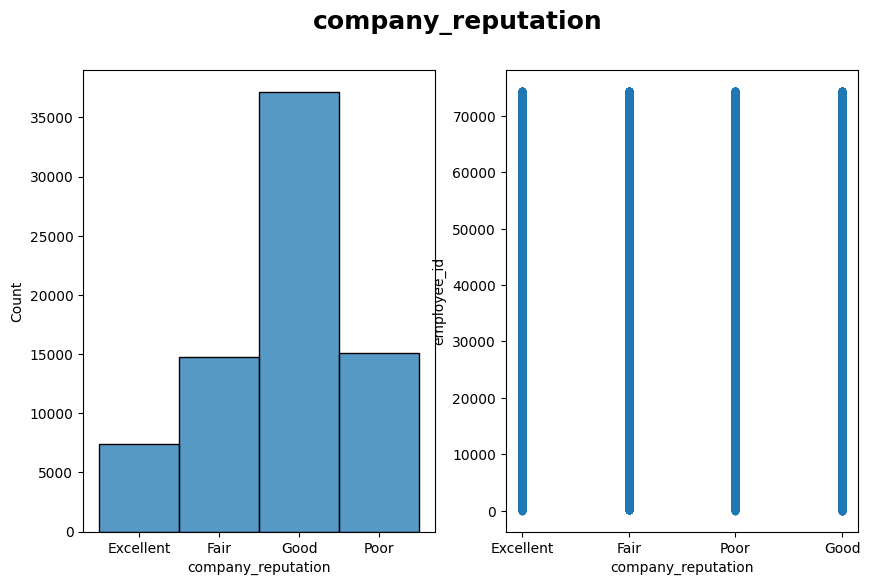

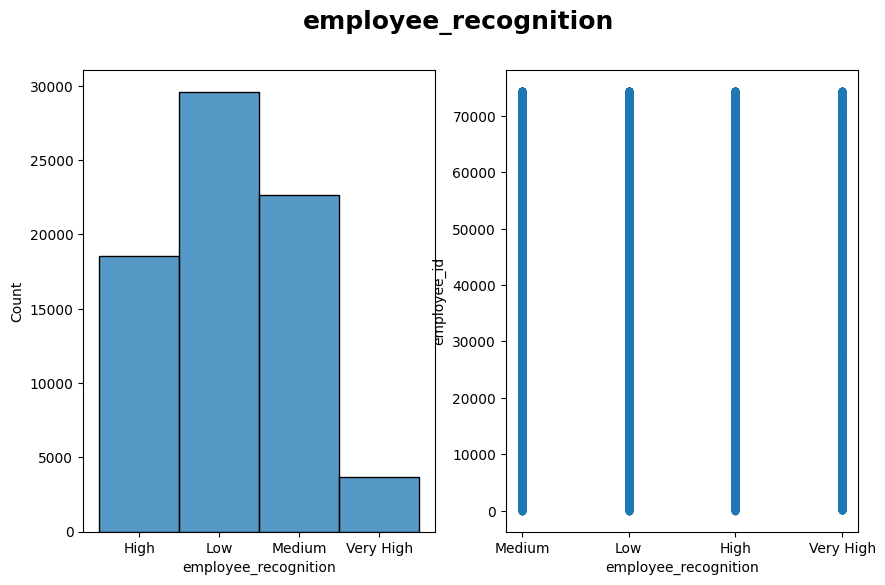

In [ ]:
columnas = np.array(df.columns)

for col in columnas[:-1]:
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle(col, fontsize=18, fontweight="bold")
    sns.histplot(df[col], ax=ax[0], kde=False)
    df.plot.scatter(x=col, y='employee_id', ax=ax[1])
    plt.show()

No se observan a simple vista valores que violen las reglas de negocio o que sean *outliers*.

## Fase 3 - Preparación de datos

In [ ]:
# Escriba su código acá
df.head()

,employee_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
# Por los graficos revisados anteriormente se decidio usar
    #yearsAtTheCompany
    #numberOfPromotions
    #numberOfDependants
    #remote_work
    #leadership_oportunities
    #innovation_oportunities
pass


### Tratamiento de variables Cualitativas

Tenemos que convertir
- remote_work
- leadership_oportunities:
- inovation_oportunities:
yes=1, no=0



In [ ]:
## Recupera la versión original de los datos
#df_final = df
## Obtiene las columnas a codificar
#categorical_features = df_final.describe(include = np.object_).columns

In [ ]:
## Codificación por frecuencia
#for feature in categorical_features:
#  freq_encoded = df_final[feature].value_counts(normalize=True)
#  df_final[f'{feature}_codificado'] = df_final[feature].map(freq_encoded)
#
#df_final.T

In [ ]:
df.remote_work.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [ ]:
df.leadership_opportunities.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [ ]:
df.innovation_opportunities.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [ ]:
df.remote_work.replace({"Yes": 1, "No": 0}, inplace=True)
df.remote_work.unique()

<ipython-input-22-3d1155169456>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.remote_work.replace({"Yes": 1, "No": 0}, inplace=True)
<ipython-input-22-3d1155169456>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.remote_work.replace({"Yes": 1, "No": 0}, inplace=True)
<ipython-input-22-3d11

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
df.leadership_opportunities.replace({"Yes": 1, "No": 0}, inplace=True)
df.leadership_opportunities.unique()

<ipython-input-23-b64201df6be1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.leadership_opportunities.replace({"Yes": 1, "No": 0}, inplace=True)
<ipython-input-23-b64201df6be1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.leadership_opportunities.replace({"Yes": 1, "No": 0}, inplace=Tr

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
df.innovation_opportunities.replace({"Yes": 1, "No": 0}, inplace=True)
df.innovation_opportunities.unique()

<ipython-input-24-7a3bd94d8125>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.innovation_opportunities.replace({"Yes": 1, "No": 0}, inplace=True)
<ipython-input-24-7a3bd94d8125>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.innovation_opportunities.replace({"Yes": 1, "No": 0}, inplace=Tr

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
df.attrition.replace({"Left": 1, "Stayed": 0}, inplace=True)
df.attrition.unique()

<ipython-input-25-0a1b6eb33d7e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.attrition.replace({"Left": 1, "Stayed": 0}, inplace=True)
<ipython-input-25-0a1b6eb33d7e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.attrition.replace({"Left": 1, "Stayed": 0}, inplace=True)
<ipython-input-2

[0, 1]
Categories (2, int64): [1, 0]

In [ ]:
df.gender.replace({"Male": 1, "Female": 0}, inplace=True)
df.gender.unique()

<ipython-input-26-6a916f1bb360>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.gender.replace({"Male": 1, "Female": 0}, inplace=True)
<ipython-input-26-6a916f1bb360>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.gender.replace({"Male": 1, "Female": 0}, inplace=True)
<ipython-input-26-6a91

[1, 0]
Categories (2, int64): [0, 1]

In [ ]:
df.job_role.replace({'Education': 0, "Media": 1, "Healthcare": 2, "Technology": 3, "Finance": 4}, inplace=True)
df.job_role.unique()

<ipython-input-27-07485a6d3f42>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.job_role.replace({'Education': 0, "Media": 1, "Healthcare": 2, "Technology": 3, "Finance": 4}, inplace=True)
<ipython-input-27-07485a6d3f42>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.job_role.replace({'Educ

[0, 1, 2, 3, 4]
Categories (5, int64): [0, 4, 2, 1, 3]

In [ ]:
df.company_reputation.replace({'Excellent': 0, "Fair": 1, "Good": 2, "Poor": 3}, inplace=True)
df.company_reputation.unique()

<ipython-input-28-8f505f3350bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.company_reputation.replace({'Excellent': 0, "Fair": 1, "Good": 2, "Poor": 3}, inplace=True)
<ipython-input-28-8f505f3350bf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.company_reputation.replace({'Excellent':

[0, 1, 3, 2]
Categories (4, int64): [0, 1, 2, 3]

In [ ]:
df.work_life_balance.replace({'Excellent': 0, "Fair": 1, "Good": 2, "Poor": 3}, inplace=True)
df.work_life_balance.unique()

<ipython-input-29-598b6b0e6475>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.work_life_balance.replace({'Excellent': 0, "Fair": 1, "Good": 2, "Poor": 3}, inplace=True)
<ipython-input-29-598b6b0e6475>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.work_life_balance.replace({'Excellent': 0

[0, 3, 2, 1]
Categories (4, int64): [0, 1, 2, 3]

In [ ]:
df.job_satisfaction.replace({'High': 0, "Low": 1, "Medium": 2, "Very High": 3}, inplace=True)
df.job_satisfaction.unique()

<ipython-input-30-7c32cadd6920>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.job_satisfaction.replace({'High': 0, "Low": 1, "Medium": 2, "Very High": 3}, inplace=True)
<ipython-input-30-7c32cadd6920>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.job_satisfaction.replace({'High': 0, "Low

[2, 0, 3, 1]
Categories (4, int64): [0, 1, 2, 3]

In [ ]:
df.performance_rating.replace({'High': 0, "Low": 1, "Average": 2, "Below Average": 3}, inplace=True)
df.performance_rating.unique()

<ipython-input-31-c052cce79913>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.performance_rating.replace({'High': 0, "Low": 1, "Average": 2, "Below Average": 3}, inplace=True)
<ipython-input-31-c052cce79913>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.performance_rating.replace({'High'

[2, 1, 0, 3]
Categories (4, int64): [2, 3, 0, 1]

In [ ]:
df.job_level.replace({'Entry': 0, "Mid": 1, "Senior": 2}, inplace=True)
df.job_level.unique()

<ipython-input-32-7ee7676a9ff8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.job_level.replace({'Entry': 0, "Mid": 1, "Senior": 2}, inplace=True)
<ipython-input-32-7ee7676a9ff8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.job_level.replace({'Entry': 0, "Mid": 1, "Senior": 2}, inplace=

[1, 2, 0]
Categories (3, int64): [0, 1, 2]

In [ ]:
df.company_size.replace({'Small': 0, "Medium": 1, "Large": 2}, inplace=True)
df.company_size.unique()

<ipython-input-33-2c49115b5f78>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.company_size.replace({'Small': 0, "Medium": 1, "Large": 2}, inplace=True)
<ipython-input-33-2c49115b5f78>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.company_size.replace({'Small': 0, "Medium": 1, "Large": 2}

[1, 0, 2]
Categories (3, int64): [2, 1, 0]

In [ ]:
df.employee_recognition.replace({'Low': 0, "Medium": 1, "High": 2, "Very High": 3}, inplace=True)
df.employee_recognition.unique()

<ipython-input-34-1ddb486e9f22>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.employee_recognition.replace({'Low': 0, "Medium": 1, "High": 2, "Very High": 3}, inplace=True)
<ipython-input-34-1ddb486e9f22>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.employee_recognition.replace({'Low': 

[1, 0, 2, 3]
Categories (4, int64): [2, 0, 1, 3]

In [ ]:
df.overtime.replace({'No': 0, "Yes": 1}, inplace=True)
df.overtime.unique()

<ipython-input-35-a3e3e5f2c521>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.overtime.replace({'No': 0, "Yes": 1}, inplace=True)
<ipython-input-35-a3e3e5f2c521>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.overtime.replace({'No': 0, "Yes": 1}, inplace=True)


array([0, 1])

In [ ]:
df.education_level.replace({'High School': 0, "Associate Degree": 1, "Bachelor’s Degree": 2, "Master’s Degree": 3, "PhD": 4}, inplace=True)
df.education_level.unique()

<ipython-input-36-69b565bfa7c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.education_level.replace({'High School': 0, "Associate Degree": 1, "Bachelor’s Degree": 2, "Master’s Degree": 3, "PhD": 4}, inplace=True)
<ipython-input-36-69b565bfa7c8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


array([1, 3, 2, 0, 4])

In [ ]:
df.marital_status.replace({'Single': 0, "Divorced": 1, "Married": 2}, inplace=True)
df.marital_status.unique()

<ipython-input-37-f702c7654435>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.marital_status.replace({'Single': 0, "Divorced": 1, "Married": 2}, inplace=True)
<ipython-input-37-f702c7654435>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.marital_status.replace({'Single': 0, "Divorced": 1,

array([2, 1, 0])

In [ ]:
len(df.columns)

24

In [ ]:
df.head().T

,0,1,2,3,4
employee_id,8410,64756,30257,65791,65026
age,31,59,24,36,56
gender,1,0,0,0,1
years_at_company,19,4,10,7,41
job_role,0,1,2,0,0
monthly_income,5390,5534,8159,3989,4821
work_life_balance,0,3,2,2,1
job_satisfaction,2,0,0,0,3
performance_rating,2,1,1,0,2
number_of_promotions,2,3,0,1,0


## Fase 4 - Modelamiento

### Modelos Línea base

+ ***Acá todos los modelos deben tener un accuracy y roc_auc mayor o igual a 0.7***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

In [ ]:
#original_df = df
#df = df_final.select_dtypes(include='number')
#df.T

In [ ]:
# Escriba su código acá

X = df.drop(['attrition'], axis=1)
y = df['attrition']
best = SelectKBest(k=24)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=24 is greater than n_features=23. All the features will be returned.
  warnings.warn(


Index(['employee_id', 'age', 'gender', 'years_at_company', 'job_role',
       'monthly_income', 'work_life_balance', 'job_satisfaction',
       'performance_rating', 'number_of_promotions', 'overtime',
       'distance_from_home', 'education_level', 'marital_status',
       'number_of_dependents', 'job_level', 'company_size', 'company_tenure',
       'remote_work', 'leadership_opportunities', 'innovation_opportunities',
       'company_reputation', 'employee_recognition'],
      dtype='object')


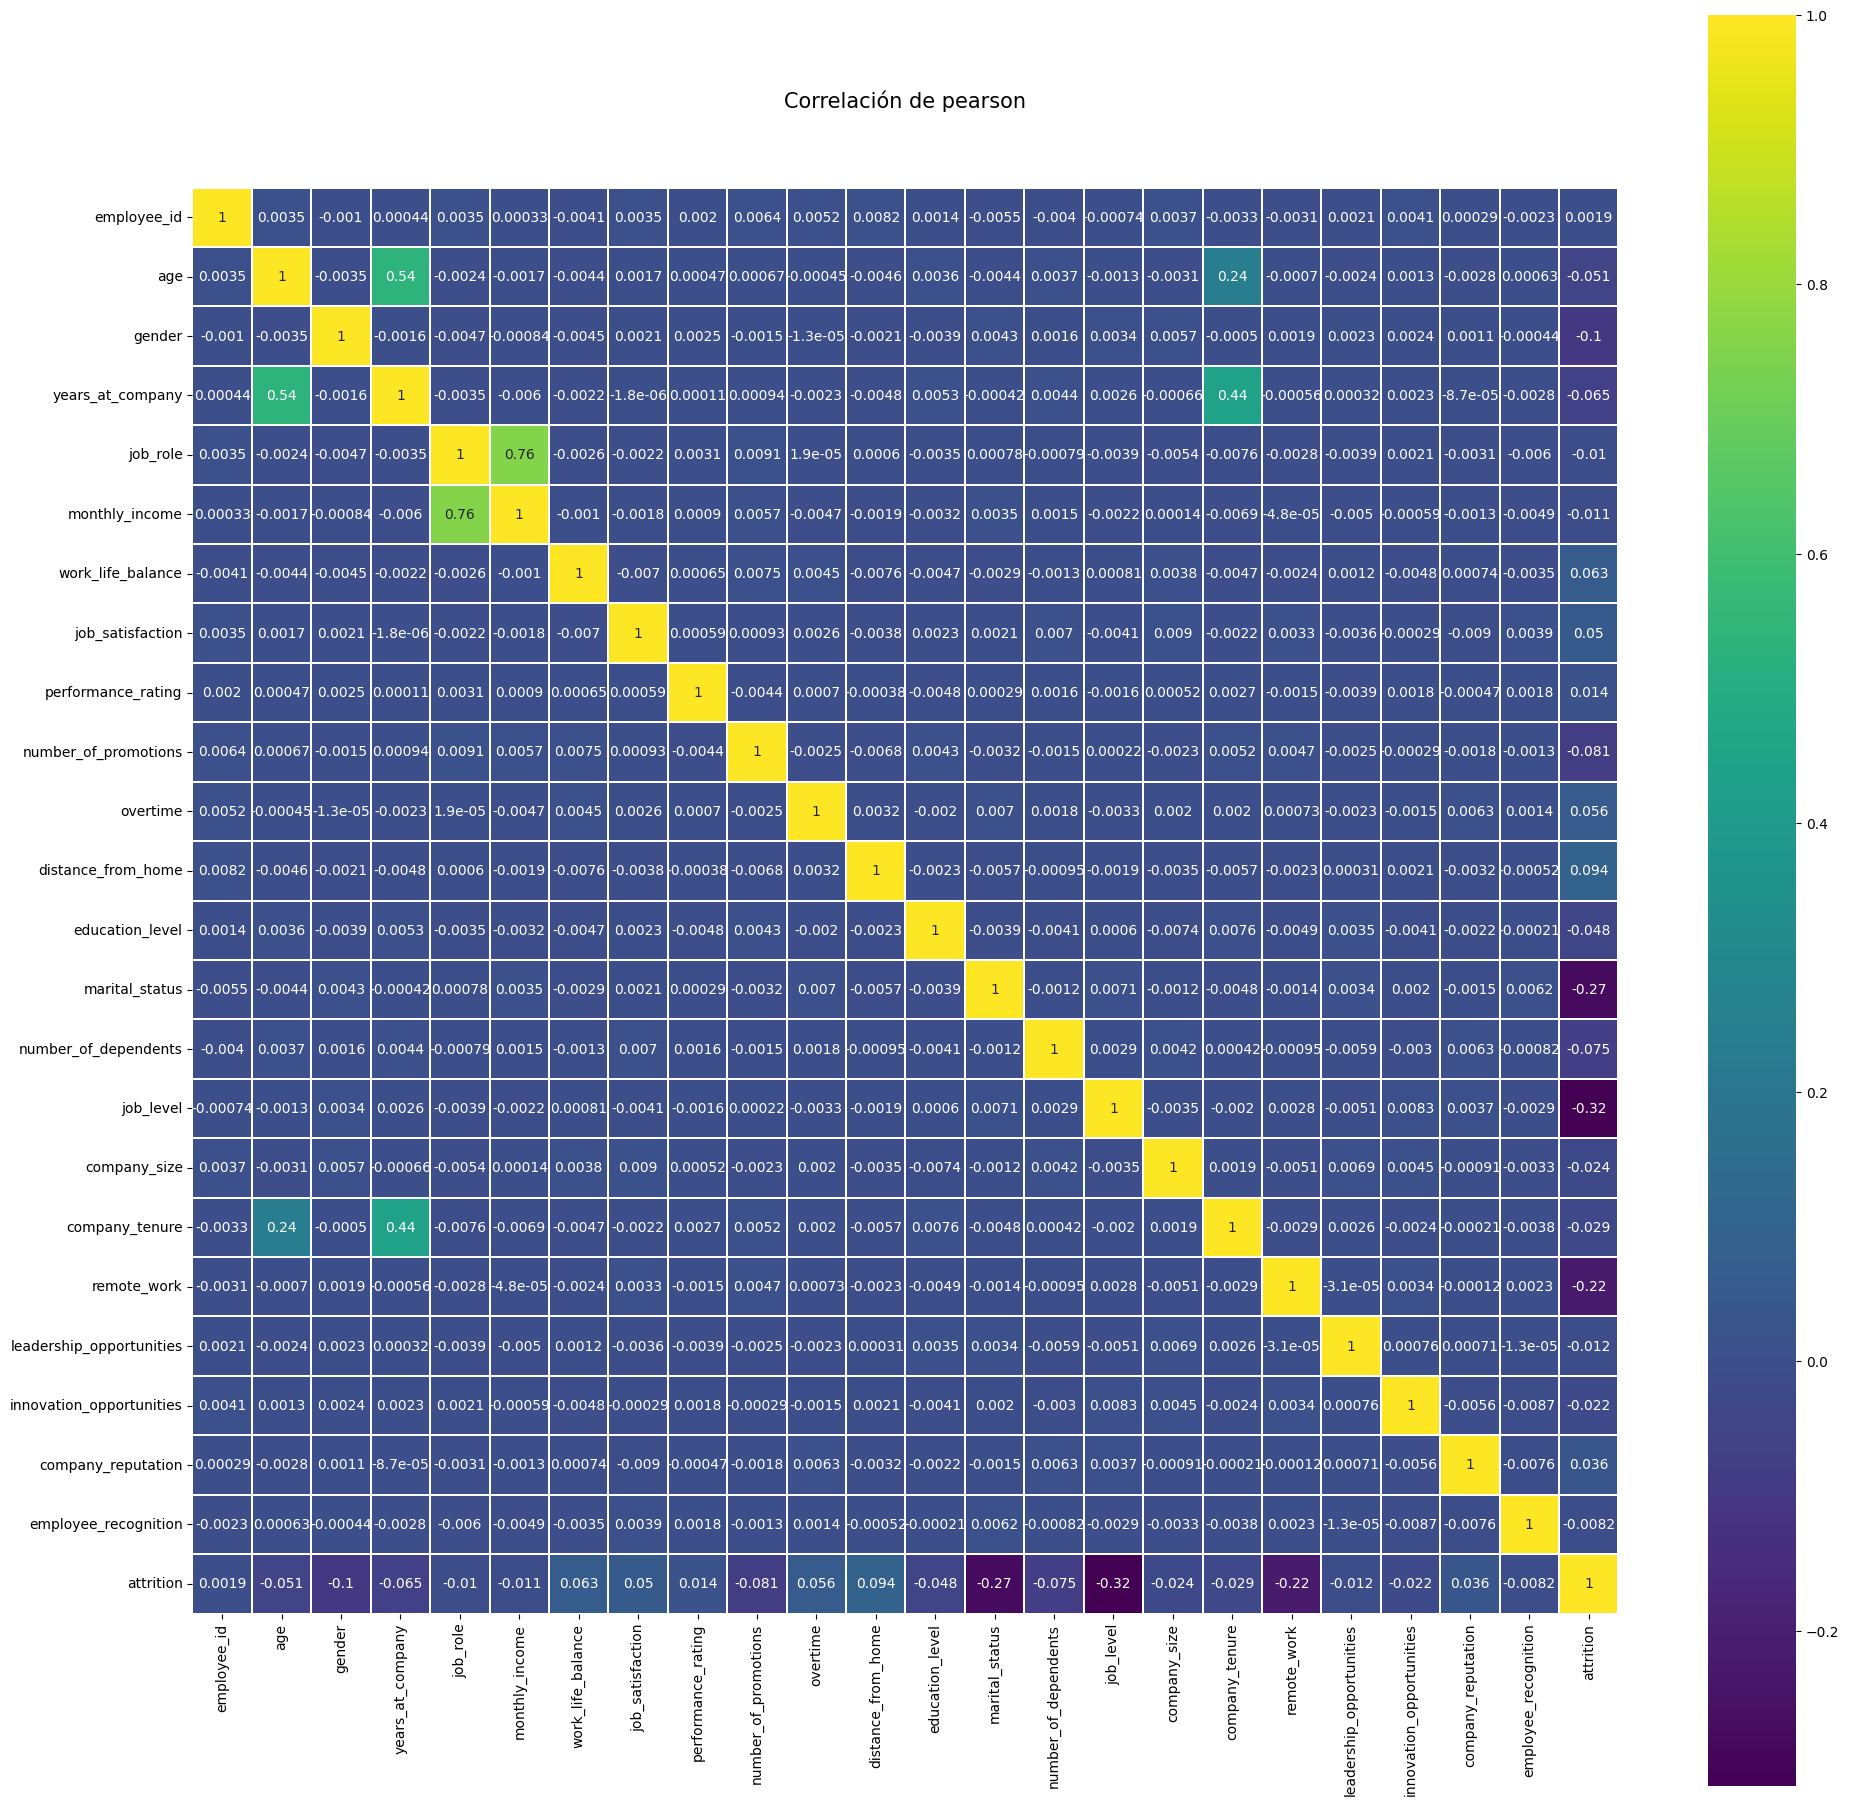

In [ ]:
used_features = X.columns[selected]
features_corr = np.append(used_features, ['attrition'])
colormap = plt.cm.viridis
plt.figure(figsize=(len(used_features),len(used_features)))
plt.title('Correlación de pearson', y=1.05, size=15)
sb.heatmap(df[features_corr].astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=4000),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=29),
    'Random Forest': RandomForestClassifier(n_estimators=500, criterion = "entropy", random_state=29, max_depth=5, max_features=.3)
}

In [ ]:
matrices = {}
history = {}
history_roc = {}
#Para cada modelo en models
#Crea una pipeline, esta es una sequencia de transformadores ¿?
for name, model in models.items():
    #Pipeline ¿? TODO:
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train, y_train)
    # Guardar el modelo entrenado en el diccionario
    y_pred = pipeline.predict(X_test)
    # Guarda matriz para poder visualizar después
    matrices[name] = confusion_matrix(y_test, y_pred)
    # Guarda el accuracy
    history[name] = accuracy_score(y_test, y_pred)
    # Guarda el roc_auc
    # Binariza las etiquetas (necesario para roc_auc_score multiclase)
    y_true_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
    y_pred_proba = pipeline.predict_proba(X_test)
    # Calcular ROC AUC con el esquema 'ovr' (one-vs-rest)
    roc_auc = roc_auc_score(y_true_bin, y_pred_proba, multi_class='ovr')
    history_roc[name] = roc_auc

In [ ]:
def ver_matriz(matriz_x: np.array, target_names: np.array, ax, title="Matriz de confusión") -> None:
    """Visualiza una matriz de confusión en un subplot dado por ax."""
    clases = target_names
    group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten() / matriz_x.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(target_names), len(target_names))

    sns.heatmap(matriz_x, annot=labels, fmt='', cmap='Blues',
                xticklabels=clases, yticklabels=clases, ax=ax)

    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("PREDICCIÓN", fontsize=10)
    ax.set_ylabel("REAL", fontsize=10)

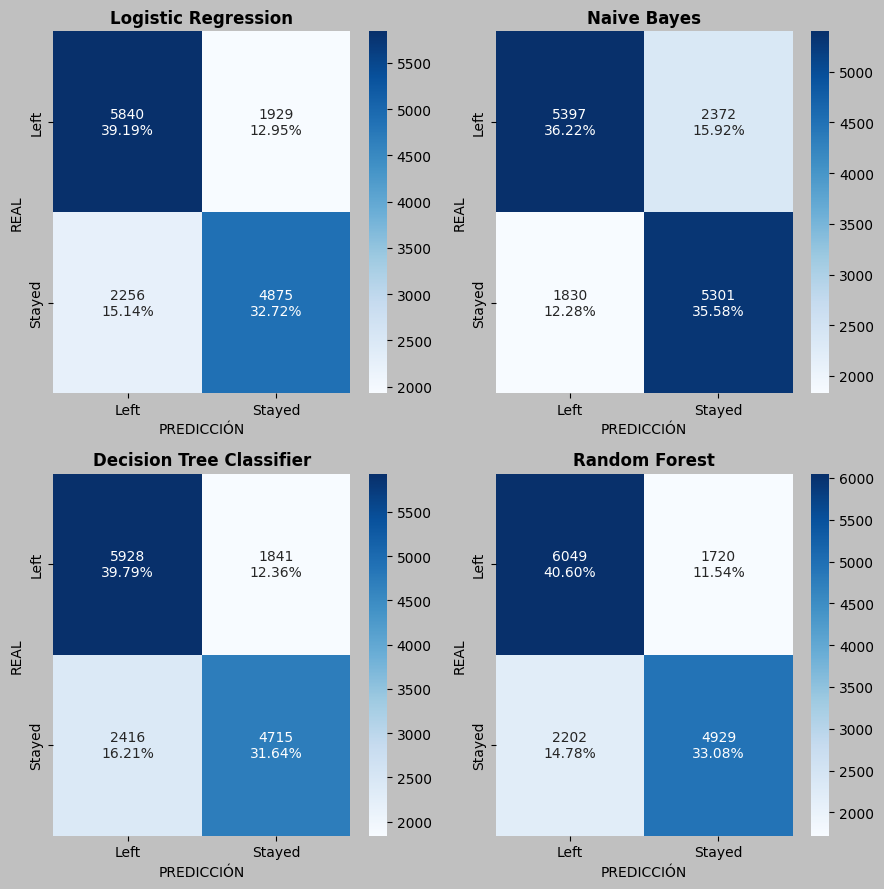

In [ ]:
# Muestra las 4 matrices en un solo gráfico
fig, axes = plt.subplots(2, 2, figsize=(9, 9), facecolor='silver')

# Iterar sobre las matrices y mostrarlas en los subplots
for ax, (nombre_modelo, matriz) in zip(axes.flat, matrices.items()):
    ver_matriz(matriz, ["Left", "Stayed"], ax, title=nombre_modelo)

plt.tight_layout()
plt.show()

#### Metricas

In [ ]:
for model in models.items():
  print(model[0])
  print(classification_report(y_test, model[1].predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      7769
           1       0.72      0.68      0.70      7131

    accuracy                           0.72     14900
   macro avg       0.72      0.72      0.72     14900
weighted avg       0.72      0.72      0.72     14900

Naive Bayes
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      7769
           1       0.69      0.74      0.72      7131

    accuracy                           0.72     14900
   macro avg       0.72      0.72      0.72     14900
weighted avg       0.72      0.72      0.72     14900

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      7769
           1       0.72      0.66      0.69      7131

    accuracy                           0.71     14900
   macro avg       0.71      0.71      0.71     14900
weighted avg     

In [ ]:
history_roc

{'Logistic Regression': 0.7964808375570587,
 'Naive Bayes': 0.7982076015267594,
 'Decision Tree Classifier': 0.7890009553843678,
 'Random Forest': 0.8211601653905736}

### Modelos línea base mejorada

+ ***Acá todos los modelos deben tener un roc_auc mayor o igual a 0.78***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

Ahora para mejorar el rendimiento de este modelo se va a usar k_best()y cross_validate


In [ ]:
def entrenarKMejoresModelos(k_columnas):
  X = df.drop(['attrition'], axis=1)
  y = df['attrition']
  best = SelectKBest(k=k_columnas)
  X_new = best.fit_transform(X, y)
  selected = best.get_support(indices=True)
  X = df[X.columns[selected]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, shuffle = True, stratify = y)
  models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=4000),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=29),
    'Random Forest': RandomForestClassifier(n_estimators=50, criterion = "entropy", random_state=29)
  }
  matrices = {}
  history = {}
  history_roc = {}
  #Para cada modelo en models
  #Crea una pipeline, esta es una sequencia de transformadores ¿?
  for name, model in models.items():
      #Pipeline ¿? TODO:
      pipeline = Pipeline(steps=[('model', model)])
      pipeline.fit(X_train, y_train)
      # Guardar el modelo entrenado en el diccionario
      y_pred = pipeline.predict(X_test)
      # Guarda matriz para poder visualizar después
      matrices[name] = confusion_matrix(y_test, y_pred)
      # Guarda el accuracy
      history[name] = accuracy_score(y_test, y_pred)
      # Guarda el roc_auc
      # Binariza las etiquetas (necesario para roc_auc_score multiclase)
      y_true_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
      y_pred_proba = pipeline.predict_proba(X_test)
      # Calcular ROC AUC con el esquema 'ovr' (one-vs-rest)
      roc_auc = roc_auc_score(y_true_bin, y_pred_proba, multi_class='ovr')
      history_roc[name] = roc_auc
  #print(history_roc.values())
  print("para k = " + str(k) + " roc_auc: " + str(min(list(history_roc.values()))) + " acuracy: " + str(min(history.values())))



Itera por los 25 parametros para encontrar la cantidad de parametros optima, usa roc_auc como metrica para decidir. Tardo 2min y despues de los 11 parametros el cambio es infimo.

In [ ]:
for k in range(1, 25):
  entrenarKMejoresModelos(k)

para k = 1 roc_auc: 0.6644926772079266 acuracy: 0.6293288590604027
para k = 2 roc_auc: 0.7362002801821727 acuracy: 0.6744295302013423
para k = 3 roc_auc: 0.7580831270694576 acuracy: 0.6901342281879195
para k = 4 roc_auc: 0.7642240880080398 acuracy: 0.6836912751677853
para k = 5 roc_auc: 0.7694498444431872 acuracy: 0.694496644295302
para k = 6 roc_auc: 0.7526843837202438 acuracy: 0.6877181208053691
para k = 7 roc_auc: 0.7362018832926875 acuracy: 0.6674496644295302
para k = 8 roc_auc: 0.7601596699879143 acuracy: 0.6862416107382551
para k = 9 roc_auc: 0.782005663396574 acuracy: 0.7065771812080537
para k = 10 roc_auc: 0.782005663396574 acuracy: 0.7081879194630872
para k = 11 roc_auc: 0.7819716232640073 acuracy: 0.7093288590604027
para k = 12 roc_auc: 0.7819716232640073 acuracy: 0.7095973154362416
para k = 13 roc_auc: 0.7819716232640073 acuracy: 0.7101342281879195
para k = 14 roc_auc: 0.7819213804257297 acuracy: 0.7101342281879195
para k = 15 roc_auc: 0.7819213804257297 acuracy: 0.710134228

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=24 is greater than n_features=23. All the features will be returned.
  warnings.warn(


para k = 24 roc_auc: 0.7819772770509501 acuracy: 0.7102013422818791


In [ ]:
# Escriba su código acá

X = df.drop(['attrition'], axis=1)
y = df['attrition']
best = SelectKBest(k=11)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
X = df[X.columns[selected]]
X

,age,gender,years_at_company,work_life_balance,number_of_promotions,overtime,distance_from_home,marital_status,number_of_dependents,job_level,remote_work
0,31,1,19,0,2,0,22,2,0,1,0
1,59,0,4,3,3,0,21,1,3,1,0
2,24,0,10,2,0,0,11,2,3,1,0
3,36,0,7,2,1,0,27,0,2,1,1
4,56,1,41,1,0,1,71,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
74493,56,0,42,3,0,1,40,0,0,2,0
74494,30,0,15,2,2,1,45,2,0,0,0
74495,52,1,5,2,0,0,4,2,4,1,0
74496,18,1,4,1,0,0,13,1,3,1,0


In [ ]:
# Escriba su código acá
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, shuffle = True, stratify = y)



In [ ]:
models = {
    'Logistic_Regression': LogisticRegression(solver='liblinear', max_iter=4000),
    'Naive_Bayes' : GaussianNB(),
    'Decision_Tree_Classifier': DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=29),
    'Random_Forest': RandomForestClassifier(n_estimators=500, criterion = "entropy", random_state=29, max_depth=5, max_features=.3)
}

In [ ]:
matrices = {}
history = {}
history_roc = {}
#Para cada modelo en models
#Crea una pipeline, esta es una sequencia de transformadores ¿?
for name, model in models.items():
    #Pipeline ¿? TODO:
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train, y_train)
    # Guardar el modelo entrenado en el diccionario
    y_pred = pipeline.predict(X_test)
    y_pred2 = pipeline.predict(X_train)
    # Guarda matriz para poder visualizar después
    matrices[name] = confusion_matrix(y_test, y_pred)
    # Guarda el accuracy
    metrics = {}
    metrics['acuracy_test'] = accuracy_score(y_test, y_pred)
    metrics['acuracy_train'] = accuracy_score(y_train, y_pred2)
    metrics['recall'] = recall_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred)
    metrics['f1'] = f1_score(y_test, y_pred)


    # Guarda el roc_auc
    # Binariza las etiquetas (necesario para roc_auc_score multiclase)
    y_true_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
    y_pred_proba = pipeline.predict_proba(X_test)
    # Calcular ROC AUC con el esquema 'ovr' (one-vs-rest)
    roc_auc = roc_auc_score(y_true_bin, y_pred_proba, multi_class='ovr')
    metrics['roc_auc'] = roc_auc
    history[name] = metrics
    history_roc[name] = roc_auc

In [ ]:
history

{'Logistic Regression': {'acuracy test': 0.718255033557047,
  'acuracy train': 0.7192187657303937,
  'recall': 0.6996041843370088,
  'precision': 0.7047849615494162,
  'f1': 0.7021850170261067},
 'Naive Bayes': {'acuracy test': 0.7093288590604027,
  'acuracy train': 0.7098895936105238,
  'recall': 0.7459711620016963,
  'precision': 0.6755857124567917,
  'f1': 0.7090359422237151},
 'Decision Tree Classifier': {'acuracy test': 0.7101342281879195,
  'acuracy train': 0.7124400147655962,
  'recall': 0.6947978512864009,
  'precision': 0.6946996466431096,
  'f1': 0.6947487454943813},
 'Random Forest': {'acuracy test': 0.7271812080536912,
  'acuracy train': 0.7323903486694184,
  'recall': 0.7208085948543964,
  'precision': 0.7092780637084435,
  'f1': 0.7149968449835238}}

In [ ]:
A = np.array([1, 1, 3])
print(A.shape)
B = np.array([[1,2], [1,2]])
print(B.shape)
C = np.array([[[1,2], [1,2], [1,2]],[[1,2], [1,2], [1,2]]])
print(C.shape)

(3,)
(2, 2)
(2, 3, 2)


In [ ]:
for model in models.items():
  print(model[0])
  accuracy_cross_val_full = cross_validate(model[1], X_train, y_train, cv=5, return_train_score = True, scoring='accuracy')
  print(f"{'Exactitud en los datos de validación':<55}: {accuracy_cross_val_full['test_score']}")
  print(f"{'Promedio de exactitud en validación':<55}: {accuracy_cross_val_full['test_score'].mean():.4f}")
  print(f"{'Exactitud en los datos de entrenamiento':<55}: {accuracy_cross_val_full['train_score']}")
  print(f"{'Promedio de exactitud en entrenamiento':<55}: {accuracy_cross_val_full['train_score'].mean():.4f}")


Logistic Regression
Exactitud en los datos de validación                   : [0.7192953  0.71484899 0.72239933 0.72136924 0.71717426]
Promedio de exactitud en validación                    : 0.7190
Exactitud en los datos de entrenamiento                : [0.71901086 0.72033223 0.71812996 0.71845047 0.71966694]
Promedio de exactitud en entrenamiento                 : 0.7191
Naive Bayes
Exactitud en los datos de validación                   : [0.71493289 0.70285235 0.70981544 0.71121738 0.71079789]
Promedio de exactitud en validación                    : 0.7099
Exactitud en los datos de entrenamiento                : [0.70936281 0.71120852 0.71015982 0.70943183 0.70991422]
Promedio de exactitud en entrenamiento                 : 0.7100
Decision Tree Classifier
Exactitud en los datos de validación                   : [0.71325503 0.71015101 0.71115772 0.71365047 0.71113348]
Promedio de exactitud en validación                    : 0.7119
Exactitud en los datos de entrenamiento              

In [ ]:
k_fold = KFold(n_splits=10)
for model in models.items():
  print("")
  print(model[0])
  accuracy_cross_val_full = cross_validate(model[1], X_train, y_train, cv=k_fold, return_train_score = True, scoring='accuracy')
  print(f"{'Exactitud en los datos de validación':<55}: {accuracy_cross_val_full['test_score']}")
  print(f"{'Promedio de exactitud en validación':<55}: {accuracy_cross_val_full['test_score'].mean():.4f}")
  print(f"{'Exactitud en los datos de entrenamiento':<55}: {accuracy_cross_val_full['train_score']}")
  print(f"{'Promedio de exactitud en entrenamiento':<55}: {accuracy_cross_val_full['train_score'].mean():.4f}")




Logistic Regression
Exactitud en los datos de validación                   : [0.71711409 0.72365772 0.71728188 0.71308725 0.71795302 0.72533557
 0.71677852 0.72583893 0.70985065 0.72579292]
Promedio de exactitud en validación                    : 0.7193
Exactitud en los datos de entrenamiento                : [0.71950856 0.71861367 0.71934077 0.71967635 0.71947127 0.71829673
 0.71917297 0.71844588 0.72014765 0.71882399]
Promedio de exactitud en entrenamiento                 : 0.7191

Naive Bayes
Exactitud en los datos de validación                   : [0.71090604 0.71828859 0.7011745  0.70671141 0.70251678 0.71560403
 0.71040268 0.7114094  0.70649438 0.71454942]
Promedio de exactitud en validación                    : 0.7098
Exactitud en los datos de entrenamiento                : [0.70996309 0.7090682  0.71070883 0.7100563  0.71093255 0.70897498
 0.70968343 0.70972072 0.71078879 0.70933463]
Promedio de exactitud en entrenamiento                 : 0.7099

Decision Tree Classifier
Exac

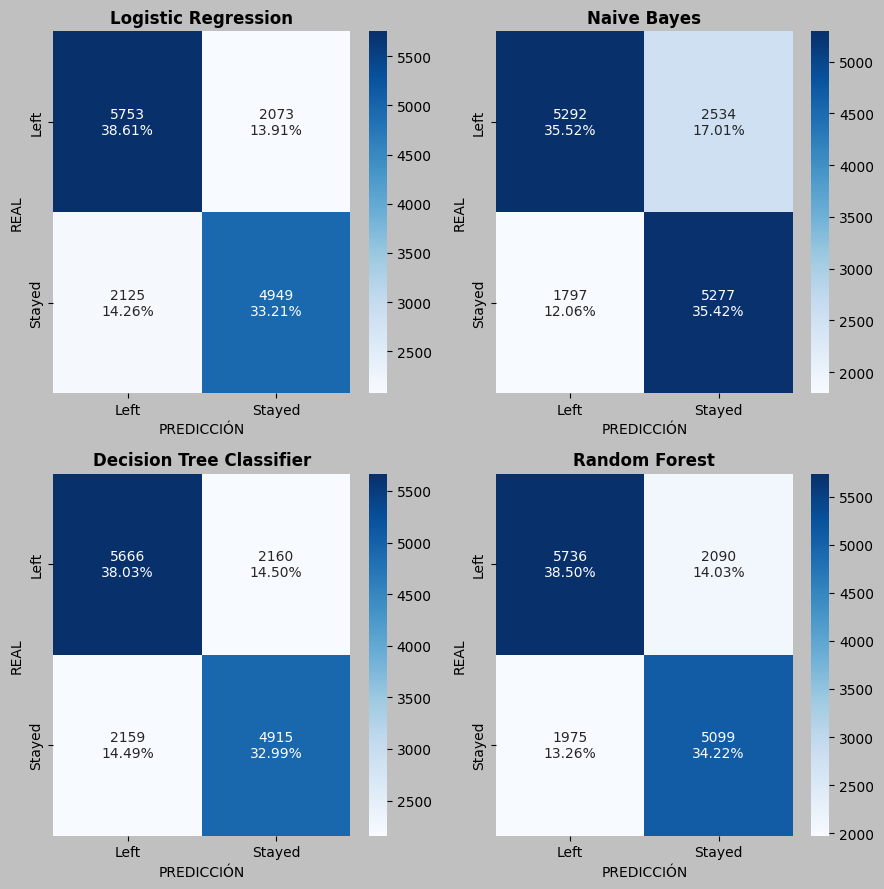

In [ ]:
# Muestra las 4 matrices en un solo gráfico
fig, axes = plt.subplots(2, 2, figsize=(9, 9), facecolor='silver')

# Iterar sobre las matrices y mostrarlas en los subplots
for ax, (nombre_modelo, matriz) in zip(axes.flat, matrices.items()):
    ver_matriz(matriz, ["Left", "Stayed"], ax, title=nombre_modelo)

plt.tight_layout()
plt.show()

In [ ]:
for model in models.items():
  print(model[0])
  print(classification_report(y_test, model[1].predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      7826
           1       0.70      0.70      0.70      7074

    accuracy                           0.72     14900
   macro avg       0.72      0.72      0.72     14900
weighted avg       0.72      0.72      0.72     14900

Naive Bayes
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      7826
           1       0.68      0.75      0.71      7074

    accuracy                           0.71     14900
   macro avg       0.71      0.71      0.71     14900
weighted avg       0.71      0.71      0.71     14900

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7826
           1       0.69      0.69      0.69      7074

    accuracy                           0.71     14900
   macro avg       0.71      0.71      0.71     14900
weighted avg     

In [ ]:
for model in models.items():
  print(model[0])
  print(classification_report(y_train, model[1].predict(X_train)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.74      0.73     31302
           1       0.71      0.70      0.70     28296

    accuracy                           0.72     59598
   macro avg       0.72      0.72      0.72     59598
weighted avg       0.72      0.72      0.72     59598

Naive Bayes
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     31302
           1       0.68      0.75      0.71     28296

    accuracy                           0.71     59598
   macro avg       0.71      0.71      0.71     59598
weighted avg       0.71      0.71      0.71     59598

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     31302
           1       0.70      0.69      0.70     28296

    accuracy                           0.71     59598
   macro avg       0.71      0.71      0.71     59598
weighted avg     

In [ ]:
history_roc

{'Logistic Regression': 0.7992730964060628,
 'Naive Bayes': 0.7880402500498365,
 'Decision Tree Classifier': 0.7819716232640073,
 'Random Forest': 0.8114083901186688}

Acuracy es marginalmente mejor y el roc_auc es superior a 0.78 en todos los modelos. Por lo que se cumple con la mejora

## Fase 5 - Evaluación

Entre los 4 modelos anteriores se puede observar que random forest presenta *overfitting* ya que su rendimiento en entrenamiento es de 1 lo cual es muy superior a el valor de pruebas.

De los tres restantes Logistic Regresion muestra la mayor *acuracy* y *roc_auc* por lo que es el mejor modelo.

### Selección y justificación de la métrica
Entre las opciones para metricas tenemos:
  acuracy: Esta tiene problemas si los datos tienen una distribucion con tendencia a una de las clases ya que puede siempre escoger la clase mas comun y tener una *acuracy* mas alta sin predecir la clase menos comun. La distribucion de este modelo tiene una pequeña tendencia a *Stayed* pero como es pequeña no es suficiente para descartar este modelo.

  presicion: Es la cantidad de predicciones verdadero positivas dividido la cantidad de predicciones positivas, esta metrica tiene problemas con clases que son poco comunes. Se podria decir que se mide, al decir una prediccion correcta que porcentaje de las veces se acierta.

  recall: Es la cantidad de predicciones verdaderas positivas dividido todas los datos etiquetados positivos. Se podria decir que esta metrica mide que tanto se acerca la prediccion del modelo a la distribucion real de los datos.

  f1: Es una mezcla de presicion y recall que cancela sus casos extremos donde estas metricas puedan dar resultados extraños.

  roc_auc:

  En conclusion: f1 y roc_auc son buenas metricas para este caso, acuracy tambien es buena debido a que no se tiene una distribucion con demasiada tendencia a una clase.

  **Finalmente se selecciona roc_auc**


In [ ]:
#accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
historia_tabla = {}
model_list = models.items()
for model in models.items():
  historia_tabla[model[0]] = model[1]
print(model)

('Random Forest', RandomForestClassifier(criterion='entropy', max_depth=5, max_features=0.3,
                       n_estimators=500, random_state=29))


In [ ]:
# Escriba su código acá

header = {
    "Modelo " : ["Logistic_Regresion", "Naive_Bayes", "Decision_Tree", "Random_Forest"],
    "acuracy train": [
                  history['Logistic_Regression']['acuracy_train'],
                  history['Naive_Bayes']['acuracy_train'],
                  history['Decision_Tree_Classifier']['acuracy_train'],
                  history['Random_Forest']['acuracy_train']
                  ],
    "acuracy test":  [
                history['Logistic_Regression']['acuracy_test'],
                  history['Naive_Bayes']['acuracy_test'],
                  history['Decision_Tree_Classifier']['acuracy_test'],
                  history['Random_Forest']['acuracy_test']
                ],
    "recall": [
               history['Logistic_Regression']['recall'],
                  history['Naive_Bayes']['recall'],
                  history['Decision_Tree_Classifier']['recall'],
                  history['Random_Forest']['recall']
            ],
    "precision": [
               history['Logistic_Regression']['precision'],
                  history['Naive_Bayes']['precision'],
                  history['Decision_Tree_Classifier']['precision'],
                  history['Random_Forest']['precision']
            ],
    "f1-score": [
                  history['Logistic_Regression']['f1'],
                  history['Naive_Bayes']['f1'],
                  history['Decision_Tree_Classifier']['f1'],
                  history['Random_Forest']['f1']
            ],
    "roc_auc": [
        history['Logistic_Regression']['roc_auc'],
        history['Naive_Bayes']['roc_auc'],
        history['Decision_Tree_Classifier']['roc_auc'],
        history['Random_Forest']['roc_auc']
    ]
}
pd_header = pd.DataFrame(data=header)
pd_header
#plazo miercoles a las 23:00

,Modelo,acuracy train,acuracy test,recall,precision,f1-score,roc_auc
0,Logistic_Regresion,0.719219,0.718255,0.699604,0.704785,0.702185,0.799273
1,Naive_Bayes,0.709890,0.709329,0.745971,0.675586,0.709036,0.788040
2,Decision_Tree,0.712440,0.710134,0.694798,0.694700,0.694749,0.781972
3,Random_Forest,0.732390,0.727181,0.720809,0.709278,0.714997,0.811408


### Se elige random_Forest porque no presenta overfitting y tiene una metrica sobre .8

In [ ]:
history

{'Logistic_Regression': {'acuracy_test': 0.718255033557047,
  'acuracy_train': 0.7192187657303937,
  'recall': 0.6996041843370088,
  'precision': 0.7047849615494162,
  'f1': 0.7021850170261067,
  'roc_auc': 0.7992730964060628},
 'Naive_Bayes': {'acuracy_test': 0.7093288590604027,
  'acuracy_train': 0.7098895936105238,
  'recall': 0.7459711620016963,
  'precision': 0.6755857124567917,
  'f1': 0.7090359422237151,
  'roc_auc': 0.7880402500498365},
 'Decision_Tree_Classifier': {'acuracy_test': 0.7101342281879195,
  'acuracy_train': 0.7124400147655962,
  'recall': 0.6947978512864009,
  'precision': 0.6946996466431096,
  'f1': 0.6947487454943813,
  'roc_auc': 0.7819716232640073},
 'Random_Forest': {'acuracy_test': 0.7271812080536912,
  'acuracy_train': 0.7323903486694184,
  'recall': 0.7208085948543964,
  'precision': 0.7092780637084435,
  'f1': 0.7149968449835238,
  'roc_auc': 0.8114083901186688}}

#### Obtención del mejor modelo usando la métrica seleccionada (recuerde que el roc_auc debe ser mayor a 0.78

In [ ]:
# Escriba su código acá

#### Interpretación de todas las métricas del mejor modelo seleccionado

## Fase 6 - Deployment

In [ ]:
# Escriba su código acá

# Pregunta

¿Recomendarían el modelo seleccionado?

  **Si, pero es importante recordar que es solo una herramienta y dependiendo de su uso puede ser efectiva o no**

Si la respuesta a la pregunta anterior es afirmativa: ¿Cuál es la razón por la cual lo recomendarían?

  **Si se utiliza para como un criterio mas para evaluar si se contrata a alguien o no, puede disminuir la cantidad de attricion de la compañia a largo plazo.**
  
  **Para una aplicacion real tambien seria importante asignar costos a los falsos positivos y falsos negativos. Tambien considerar las implicaciones morales de usar columnas como genero o estado civil para tomar este tipo de decisiones.**

Si la respuesta a la pregunta es negativa: ¿Cuál es la alternativa propuesta?

TODO: mirar inconsistencias de la edad y años de trabajo